In [1]:
import pandas as pd
import numpy as np

In [ ]:
!pip install tensorflow
!pip install pubchempy
!pip install scipy
!pip install scikit-learn matplotlib
!pip install padelpy

In [ ]:
import padelpy
from padelpy import padeldescriptor, from_smiles

In [14]:
df = pd.read_csv('pancreas_anchor_combo.csv')
df.head()

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,Library Pathway,Maxc,Library IC50,Combo IC50,Library Emax,Bliss Emax,Combo Emax,Delta Xmid,Delta Emax,Synergy?
0,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,4.000,Irinotecan,TOP1,DNA replication,5.0,9.822419,6.307371,0.596663,0.435165,0.158411,3.515048,0.276753,1
1,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Gemcitabine,Pyrimidine antimetabolite,DNA replication,0.100,Irinotecan,TOP1,DNA replication,5.0,9.822419,11.028039,0.596663,0.497404,0.603761,-1.205620,-0.106358,0
2,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Paclitaxel,Microtubule stabiliser,Mitosis,0.025,Irinotecan,TOP1,DNA replication,5.0,9.822419,12.805274,0.596663,0.280913,0.404697,-2.982855,-0.123784,0
3,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Lapatinib,"EGFR, ERBB2",EGFR signaling,2.500,Irinotecan,TOP1,DNA replication,5.0,9.822419,9.121426,0.596663,0.565044,0.487187,0.700993,0.077857,0
4,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Palbociclib,"CDK4, CDK6",Cell cycle,2.000,Irinotecan,TOP1,DNA replication,5.0,9.822419,10.816607,0.596663,0.580932,0.685140,-0.994188,-0.104208,0


In [21]:
print([col for col in df.columns])

['Cell Line name', 'SDIM', 'Tissue', 'Cancer Type', 'Anchor Name', 'Anchor Target', 'Anchor Pathway', 'Anchor Conc', 'Library Name', 'library Target', ' Library Pathway', 'Maxc', 'Library IC50', 'Combo IC50', 'Library Emax', 'Bliss Emax', 'Combo Emax', 'Delta Xmid', 'Delta Emax', 'Synergy?']


Anchor Pathway  Apoptosis regulation  Cell cycle  DNA replication  \
Cell Line name                                                      
AsPC-1                            50         150              200   
BxPC-3                            58         172              228   
CAPAN-1                           66         198              264   
CAPAN-2                           50         150              200   
CFPAC-1                           50         150              200   
DAN-G                             74         218              294   
HPAC                              86         256              332   
Hs-766T                           56         174              230   
HuP-T3                            50         150              200   
HuP-T4                            50         150              200   
KP-1N                            204         652              834   
KP-2                              58         174              224   
KP-3                              

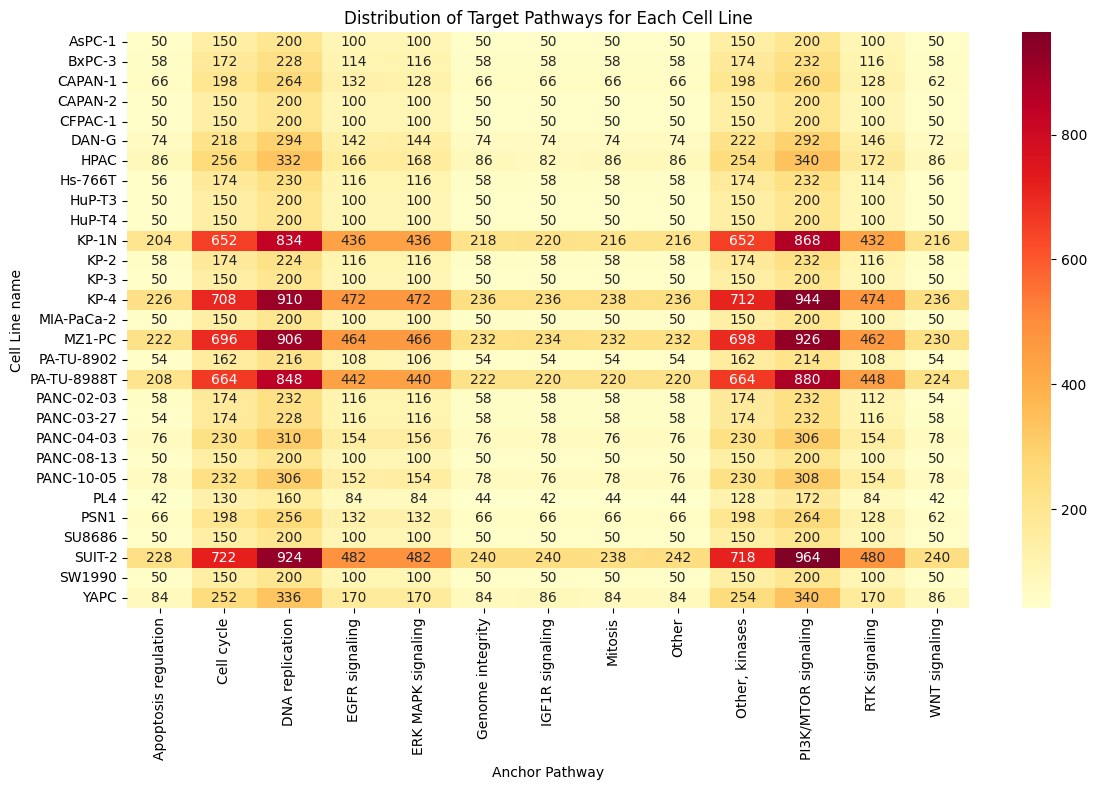

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count occurrences
pivot_table = df.pivot_table(index='Cell Line name', 
                             columns='Anchor Pathway', 
                             aggfunc='size', 
                             fill_value=0)

# Display the pivot table to check the data
print(pivot_table)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='d')

plt.title('Distribution of Target Pathways for Each Cell Line')
plt.xlabel('Anchor Pathway')
plt.ylabel('Cell Line name')
plt.tight_layout()
plt.show()

 Library Pathway  Apoptosis regulation  Cell cycle  DNA replication  \
Cell Line name                                                        
AsPC-1                              50         150              200   
BxPC-3                              50         200              300   
CAPAN-1                             50         150              200   
CAPAN-2                             50         150              200   
CFPAC-1                             50         150              200   
DAN-G                               50         250              250   
HPAC                                50         200              500   
Hs-766T                            100         150              250   
HuP-T3                              50         150              200   
HuP-T4                              50         150              200   
KP-1N                              500         500             1550   
KP-2                                50         150              400   
KP-3  

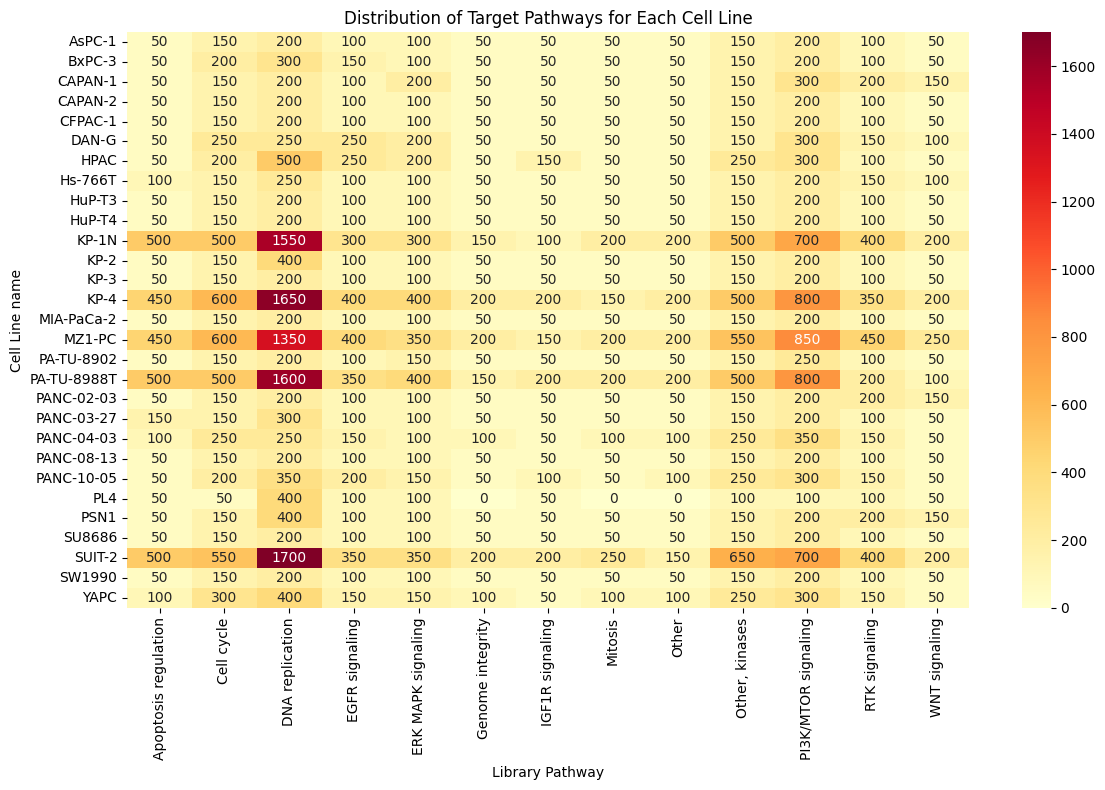

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count occurrences
pivot_table = df.pivot_table(index='Cell Line name', 
                             columns=' Library Pathway', 
                             aggfunc='size', 
                             fill_value=0)

# Display the pivot table to check the data
print(pivot_table)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='d')

plt.title('Distribution of Target Pathways for Each Cell Line')
plt.xlabel('Library Pathway')
plt.ylabel('Cell Line name')
plt.tight_layout()
plt.show()

In [109]:
import pubchempy as pcp

# Get the unique values in the 'Anchor Name' column
unique_anchors = df['Anchor Name'].unique()

# Create a new column 'Anchor Smile' to store the results
df['Anchor Smile'] = ''

# Iterate over the unique anchor names and fetch the corresponding smiles
for anchor_name in unique_anchors:
    compounds = pcp.get_compounds(anchor_name, 'name')
    if compounds:
        smile = compounds[0].canonical_smiles
        df.loc[df['Anchor Name'] == anchor_name, 'Anchor Smile'] = smile
        print(f"Retrieved SMILE for {anchor_name}: {smile}")

Retrieved SMILE for Navitoclax: CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(=O)(=O)C4=CC(=C(C=C4)NC(CCN5CCOCC5)CSC6=CC=CC=C6)S(=O)(=O)C(F)(F)F)C7=CC=C(C=C7)Cl)C
Retrieved SMILE for Gemcitabine: C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)(F)F
Retrieved SMILE for Paclitaxel: CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)C(C(C5=CC=CC=C5)NC(=O)C6=CC=CC=C6)O)O)OC(=O)C7=CC=CC=C7)(CO4)OC(=O)C)O)C)OC(=O)C
Retrieved SMILE for Lapatinib: CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3NC4=CC(=C(C=C4)OCC5=CC(=CC=C5)F)Cl
Retrieved SMILE for Palbociclib: CC1=C(C(=O)N(C2=NC(=NC=C12)NC3=NC=C(C=C3)N4CCNCC4)C5CCCC5)C(=O)C
Retrieved SMILE for Taselisib: CC1=NN(C(=N1)C2=CN3CCOC4=C(C3=N2)C=CC(=C4)C5=CN(N=C5)C(C)(C)C(=O)N)C(C)C
Retrieved SMILE for Oxaliplatin: C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2]
Retrieved SMILE for Ruxolitinib: C1CCC(C1)C(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3
Retrieved SMILE for Cisplatin: N.N.Cl[Pt]Cl
Retrieved SMILE for Linsitinib: CC1(CC(C1)C2=NC(=C3N2C=CN=C3N)C4=CC5=C(C=C4)C=CC(=N5)C6=CC=CC

In [110]:
import pubchempy as pcp

# Get the unique values in the 'Anchor Name' column
unique_anchors = df['Library Name'].unique()

# Create a new column 'Anchor Smile' to store the results
df['Library Smile'] = ''

# Iterate over the unique anchor names and fetch the corresponding smiles
for library_name in unique_anchors:
    compounds = pcp.get_compounds(library_name, 'name')
    if compounds:
        smile = compounds[0].canonical_smiles
        df.loc[df['Library Name'] == library_name, 'Library Smile'] = smile
        print(f"Retrieved SMILE for {library_name}: {smile}")

Retrieved SMILE for Irinotecan: CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=C1C=C(C=C5)OC(=O)N6CCC(CC6)N7CCCCC7
Retrieved SMILE for Oxaliplatin: C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2]
Retrieved SMILE for Erlotinib: COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C)OCCOC
Retrieved SMILE for Cisplatin: N.N.Cl[Pt]Cl
Retrieved SMILE for Navitoclax: CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(=O)(=O)C4=CC(=C(C=C4)NC(CCN5CCOCC5)CSC6=CC=CC=C6)S(=O)(=O)C(F)(F)F)C7=CC=C(C=C7)Cl)C
Retrieved SMILE for Crizotinib: CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N=C3)C4CCNCC4)N
Retrieved SMILE for LGK974: CC1=CC(=CN=C1C2=CC(=NC=C2)C)CC(=O)NC3=NC=C(C=C3)C4=NC=CN=C4
Retrieved SMILE for MK-1775: CC(C)(C1=NC(=CC=C1)N2C3=NC(=NC=C3C(=O)N2CC=C)NC4=CC=C(C=C4)N5CCN(CC5)C)O
Retrieved SMILE for Sorafenib: CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC(=C(C=C3)Cl)C(F)(F)F
Retrieved SMILE for Gemcitabine: C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)(F)F
Retrieved SMILE for Trametinib: CC1=C2C(=C(N(C1=O)C)NC3=C(C=C(C=C

In [111]:
df

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,Library IC50,Combo IC50,Library Emax,Bliss Emax,Combo Emax,Delta Xmid,Delta Emax,Synergy?,Anchor Smile,Library Smile
0,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,4.0000,Irinotecan,TOP1,...,9.822419,6.307371,0.596663,0.435165,0.158411,3.515048,0.276753,1,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
1,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Gemcitabine,Pyrimidine antimetabolite,DNA replication,0.1000,Irinotecan,TOP1,...,9.822419,11.028039,0.596663,0.497404,0.603761,-1.205620,-0.106358,0,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)(F)F,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
2,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Paclitaxel,Microtubule stabiliser,Mitosis,0.0250,Irinotecan,TOP1,...,9.822419,12.805274,0.596663,0.280913,0.404697,-2.982855,-0.123784,0,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
3,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Lapatinib,"EGFR, ERBB2",EGFR signaling,2.5000,Irinotecan,TOP1,...,9.822419,9.121426,0.596663,0.565044,0.487187,0.700993,0.077857,0,CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3...,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
4,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Palbociclib,"CDK4, CDK6",Cell cycle,2.0000,Irinotecan,TOP1,...,9.822419,10.816607,0.596663,0.580932,0.685140,-0.994188,-0.104208,0,CC1=C(C(=O)N(C2=NC(=NC=C12)NC3=NC=C(C=C3)N4CCN...,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66295,PA-TU-8902,SIDM00455,Pancreas,Pancreatic Carcinoma,AZD7762,"CHEK1, CHEK2",Cell cycle,0.0625,SCH772984,"ERK1, ERK2",...,9.289762,8.648191,0.521963,0.493507,0.447536,0.641571,0.045971,0,C1CC(CNC1)NC(=O)C2=C(C=C(S2)C3=CC(=CC=C3)F)NC(...,C1CN(CC1C(=O)NC2=CC3=C(C=C2)NN=C3C4=CC=NC=C4)C...
66296,PA-TU-8902,SIDM00455,Pancreas,Pancreatic Carcinoma,MK-2206,"AKT1, AKT2",PI3K/MTOR signaling,1.2500,SCH772984,"ERK1, ERK2",...,9.289762,5.229123,0.521963,0.484691,0.224329,4.060639,0.260362,1,C1CC(C1)(C2=CC=C(C=C2)C3=C(C=C4C(=N3)C=CN5C4=N...,C1CN(CC1C(=O)NC2=CC3=C(C=C2)NN=C3C4=CC=NC=C4)C...
66297,PA-TU-8902,SIDM00455,Pancreas,Pancreatic Carcinoma,Sorafenib,"PDGFR, KIT, VEGFR, RAF","Other, kinases",1.2500,SCH772984,"ERK1, ERK2",...,9.289762,10.781957,0.521963,0.479108,0.580071,-1.492196,-0.100963,0,CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC...,C1CN(CC1C(=O)NC2=CC3=C(C=C2)NN=C3C4=CC=NC=C4)C...
66298,PA-TU-8902,SIDM00455,Pancreas,Pancreatic Carcinoma,5-Fluorouracil,Antimetabolite (DNA & RNA),Other,1.0000,SCH772984,"ERK1, ERK2",...,9.289762,9.661793,0.521963,0.485650,0.511761,-0.372031,-0.026111,0,C1=C(C(=O)NC(=O)N1)F,C1CN(CC1C(=O)NC2=CC3=C(C=C2)NN=C3C4=CC=NC=C4)C...


In [112]:
df_descriptor = df

In [113]:
anchor_selection = ['Anchor Smile','Anchor Name']
df_anchor_descriptor_selection = df_descriptor[anchor_selection]
df_anchor_descriptor_selection = df_anchor_descriptor_selection.drop_duplicates()
# df_anchor_descriptor_selection.to_csv('anchor_molecules.smi', sep='\t', index=False, header=False)

In [114]:
df_anchor_descriptor_selection

,Anchor Smile,Anchor Name
0,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,Navitoclax
1,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)(F)F,Gemcitabine
2,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,Paclitaxel
3,CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3...,Lapatinib
4,CC1=C(C(=O)N(C2=NC(=NC=C12)NC3=NC=C(C=C3)N4CCN...,Palbociclib
5,CC1=NN(C(=N1)C2=CN3CCOC4=C(C3=N2)C=CC(=C4)C5=C...,Taselisib
7,C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2],Oxaliplatin
8,C1CCC(C1)C(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3,Ruxolitinib
9,N.N.Cl[Pt]Cl,Cisplatin
10,CC1(CC(C1)C2=NC(=C3N2C=CN=C3N)C4=CC5=C(C=C4)C=...,Linsitinib


In [82]:
df_desc = df_anchor_descriptor_selection['Anchor Smile'].apply(lambda x: from_smiles(x, descriptors=True, fingerprints=False, timeout=120))

In [116]:
df_desc

0      {'nAcid': '0', 'ALogP': '5.5272', 'ALogp2': '3...
1      {'nAcid': '0', 'ALogP': '-1.9392000000000005',...
2      {'nAcid': '0', 'ALogP': '1.559100000000003', '...
3      {'nAcid': '0', 'ALogP': '0.44140000000000296',...
4      {'nAcid': '0', 'ALogP': '-3.766200000000003', ...
5      {'nAcid': '0', 'ALogP': '-1.878600000000001', ...
7      {'nAcid': '2', 'ALogP': '', 'ALogp2': '', 'AMR...
8      {'nAcid': '0', 'ALogP': '-2.0063999999999997',...
9      {'nAcid': '0', 'ALogP': '1.0674', 'ALogp2': '1...
10     {'nAcid': '0', 'ALogP': '-0.8052000000000014',...
11     {'nAcid': '0', 'ALogP': '-0.07319999999999949'...
12     {'nAcid': '0', 'ALogP': '-0.2492999999999959',...
17     {'nAcid': '0', 'ALogP': '1.4815000000000005', ...
19     {'nAcid': '0', 'ALogP': '-0.12909999999999747'...
23     {'nAcid': '0', 'ALogP': '-0.5478000000000008',...
34     {'nAcid': '0', 'ALogP': '0.3718999999999998', ...
38     {'nAcid': '1', 'ALogP': '-1.703199999999999', ...
43     {'nAcid': '0', 'ALogP': 

In [117]:
# Initialize an empty list to store the flattened DataFrames
flattened_dfs = []

# Iterate over each row in the DataFrame
for row in df_desc:
    # Flatten the JSON data
    flattened_df = pd.json_normalize(row)

    # Append the flattened DataFrame to the list
    flattened_dfs.append(flattened_df)

# Concatenate the flattened DataFrames into one
flattened_df = pd.concat(flattened_dfs, ignore_index=True)

# Reset the index to get the desired column order
flattened_df = flattened_df.reset_index(drop=True)

flattened_df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,5.5272,30.549939839999997,269.65529999999995,142.25661500000032,0,0,120,65,55,...,,,,,,,,,,
1,0,-1.9392000000000005,3.7604966400000017,51.52820000000001,30.796722999999982,0,0,29,18,11,...,0.7991650213805084,0.10524438353266787,0.4786137358813394,0.40028848544300416,0.3888387473669886,12.983401322897853,28.751190962964476,59.33067543316399,0.6987475320707626,1.2677409686913321
2,0,1.559100000000003,2.4307928100000096,226.34050000000002,129.05444300000005,0,0,113,62,51,...,,,,,,,,,,
3,0,0.44140000000000296,0.1948339600000026,167.10169999999997,81.62161799999994,27,28,66,40,26,...,0.9024104328614526,0.07162947647898117,0.552049383200226,0.3057189733303623,0.24323191284496024,58.20138873396773,304.6132831756085,693.6425745536756,0.853615649292179,1.1010002693755485
4,0,-3.766200000000003,14.184262440000023,120.11510000000001,70.88099699999995,0,0,62,33,29,...,,,,,,,,,,
5,0,-1.878600000000001,3.5291379600000035,131.789,71.31420399999996,21,21,62,34,28,...,0.7195760138023011,0.22904274559951904,0.598411650160701,0.5073472637074694,0.37343366156393454,30.90891059680698,204.0219460607565,484.9935476654007,0.5793640207034516,1.479192575432105
6,2,,,,35.32310199999998,0,0,29,15,14,...,,,,,,,,,,
7,0,-2.0063999999999997,4.025640959999999,84.50059999999999,48.52227399999999,14,15,41,23,18,...,0.7828727665409276,0.1296639674293414,0.5582404564395885,0.358010646945701,0.3634424885928198,20.472920124396527,76.00015407834755,172.65914190844077,0.6743091498113916,1.2796935919781094
8,0,1.0674,1.13934276,12.2044,17.060758,0,0,11,5,6,...,,,,,,,,,,
9,0,-0.8052000000000014,0.6483470400000022,133.5828,67.39823899999996,25,27,55,32,23,...,0.7159157320546976,0.20871729373615536,0.5313585400881646,0.36591010351419684,0.32634055514833615,28.577059885839162,178.93646349268545,470.33088767696404,0.5738735980820465,1.2236091987506976


In [118]:
flattened_df = flattened_df.add_prefix('anchor_')

In [119]:
# Reset the index of both DataFrames
df_anchor_descriptor_selection = df_anchor_descriptor_selection.reset_index(drop=True)
flattened_df = flattened_df.reset_index(drop=True)

# Concatenate the DataFrames horizontally
combined_df = pd.concat([df_anchor_descriptor_selection, flattened_df], axis=1)

In [122]:
combined_df

,Anchor Smile,Anchor Name,anchor_nAcid,anchor_ALogP,anchor_ALogp2,anchor_AMR,anchor_apol,anchor_naAromAtom,anchor_nAromBond,anchor_nAtom,...,anchor_P1s,anchor_P2s,anchor_E1s,anchor_E2s,anchor_E3s,anchor_Ts,anchor_As,anchor_Vs,anchor_Ks,anchor_Ds
0,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,Navitoclax,0,5.5272,30.549939839999997,269.65529999999995,142.25661500000032,0,0,120,...,,,,,,,,,,
1,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)(F)F,Gemcitabine,0,-1.9392000000000005,3.7604966400000017,51.52820000000001,30.796722999999982,0,0,29,...,0.7991650213805084,0.10524438353266787,0.4786137358813394,0.40028848544300416,0.3888387473669886,12.983401322897853,28.751190962964476,59.33067543316399,0.6987475320707626,1.2677409686913321
2,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,Paclitaxel,0,1.559100000000003,2.4307928100000096,226.34050000000002,129.05444300000005,0,0,113,...,,,,,,,,,,
3,CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3...,Lapatinib,0,0.44140000000000296,0.1948339600000026,167.10169999999997,81.62161799999994,27,28,66,...,0.9024104328614526,0.07162947647898117,0.552049383200226,0.3057189733303623,0.24323191284496024,58.20138873396773,304.6132831756085,693.6425745536756,0.853615649292179,1.1010002693755485
4,CC1=C(C(=O)N(C2=NC(=NC=C12)NC3=NC=C(C=C3)N4CCN...,Palbociclib,0,-3.766200000000003,14.184262440000023,120.11510000000001,70.88099699999995,0,0,62,...,,,,,,,,,,
5,CC1=NN(C(=N1)C2=CN3CCOC4=C(C3=N2)C=CC(=C4)C5=C...,Taselisib,0,-1.878600000000001,3.5291379600000035,131.789,71.31420399999996,21,21,62,...,0.7195760138023011,0.22904274559951904,0.598411650160701,0.5073472637074694,0.37343366156393454,30.90891059680698,204.0219460607565,484.9935476654007,0.5793640207034516,1.479192575432105
6,C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2],Oxaliplatin,2,,,,35.32310199999998,0,0,29,...,,,,,,,,,,
7,C1CCC(C1)C(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3,Ruxolitinib,0,-2.0063999999999997,4.025640959999999,84.50059999999999,48.52227399999999,14,15,41,...,0.7828727665409276,0.1296639674293414,0.5582404564395885,0.358010646945701,0.3634424885928198,20.472920124396527,76.00015407834755,172.65914190844077,0.6743091498113916,1.2796935919781094
8,N.N.Cl[Pt]Cl,Cisplatin,0,1.0674,1.13934276,12.2044,17.060758,0,0,11,...,,,,,,,,,,
9,CC1(CC(C1)C2=NC(=C3N2C=CN=C3N)C4=CC5=C(C=C4)C=...,Linsitinib,0,-0.8052000000000014,0.6483470400000022,133.5828,67.39823899999996,25,27,55,...,0.7159157320546976,0.20871729373615536,0.5313585400881646,0.36591010351419684,0.32634055514833615,28.577059885839162,178.93646349268545,470.33088767696404,0.5738735980820465,1.2236091987506976


In [121]:
combined_df.to_csv('anchor_descriptors.csv', index=False)

In [123]:
library_selection = ['Library Smile','Library Name']
df_library_descriptor_selection = df_descriptor[library_selection]
df_library_descriptor_selection = df_library_descriptor_selection.drop_duplicates()
# df_library_descriptor_selection.to_csv('library_molecules.smi', sep='\t', index=False, header=False)

In [124]:
df_library_descriptor_selection

,Library Smile,Library Name
0,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...,Irinotecan
46,C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2],Oxaliplatin
154,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,Erlotinib
156,N.N.Cl[Pt]Cl,Cisplatin
177,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,Navitoclax
183,CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N...,Crizotinib
212,CC1=CC(=CN=C1C2=CC(=NC=C2)C)CC(=O)NC3=NC=C(C=C...,LGK974
217,CC(C)(C1=NC(=CC=C1)N2C3=NC(=NC=C3C(=O)N2CC=C)N...,MK-1775
234,CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC...,Sorafenib
275,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)(F)F,Gemcitabine


In [125]:
df_library_desc = df_library_descriptor_selection['Library Smile'].apply(lambda x: from_smiles(x, descriptors=True, fingerprints=False, timeout=120))

In [126]:
df_library_desc

0       {'nAcid': '0', 'ALogP': '-2.509699999999997', ...
46      {'nAcid': '2', 'ALogP': '', 'ALogp2': '', 'AMR...
154     {'nAcid': '0', 'ALogP': '-0.12909999999999747'...
156     {'nAcid': '0', 'ALogP': '1.0674', 'ALogp2': '1...
177     {'nAcid': '0', 'ALogP': '5.5272', 'ALogp2': '3...
183     {'nAcid': '0', 'ALogP': '-0.07319999999999949'...
212     {'nAcid': '0', 'ALogP': '-2.8056000000000023',...
217     {'nAcid': '0', 'ALogP': '-0.2492999999999959',...
234     {'nAcid': '0', 'ALogP': '0.6236999999999997', ...
275     {'nAcid': '0', 'ALogP': '-1.9392000000000005',...
381     {'nAcid': '0', 'ALogP': '-0.5478000000000008',...
417     {'nAcid': '0', 'ALogP': '-2.0063999999999997',...
429     {'nAcid': '0', 'ALogP': '-0.8052000000000014',...
447     {'nAcid': '0', 'ALogP': '0.44140000000000296',...
451     {'nAcid': '0', 'ALogP': '-1.878600000000001', ...
459     {'nAcid': '0', 'ALogP': '-3.0966', 'ALogp2': '...
540     {'nAcid': '1', 'ALogP': '-1.703199999999999', ...
546     {'nAci

In [127]:
# Initialize an empty list to store the flattened DataFrames
flattened_dfs = []

# Iterate over each row in the DataFrame
for row in df_library_desc:
    # Flatten the JSON data
    flattened_df = pd.json_normalize(row)

    # Append the flattened DataFrame to the list
    flattened_dfs.append(flattened_df)

# Concatenate the flattened DataFrames into one
flattened_df = pd.concat(flattened_dfs, ignore_index=True)

# Reset the index to get the desired column order
flattened_df = flattened_df.reset_index(drop=True)

flattened_df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,-2.509699999999997,6.298594089999985,156.0788,92.63013399999993,0,0,81,43,38,...,,,,,,,,,,
1,2,,,,35.32310199999998,0,0,29,15,14,...,,,,,,,,,,
2,0,-0.12909999999999747,0.016666809999999345,117.3146,60.564238999999965,16,17,52,29,23,...,0.7218787075960303,0.24782798097686345,0.4311783714859006,0.3138155856059181,0.31204912000056567,28.306904425983443,166.88866506590503,318.12007111970433,0.5828180613940457,1.0570430770923844
3,0,1.0674,1.13934276,12.2044,17.060758,0,0,11,5,6,...,,,,,,,,,,
4,0,5.5272,30.549939839999997,269.65529999999995,142.25661500000032,0,0,120,65,55,...,,,,,,,,,,
5,0,-0.07319999999999949,0.005358239999999925,119.50500000000001,62.84844599999997,17,17,52,30,22,...,0.7165888695898662,0.18260335747625445,0.5679368176502869,0.3657186300322259,0.26433756527400626,22.41854775682286,111.32251146802099,282.3672220685222,0.5748833043847993,1.197993012956519
6,0,-2.8056000000000023,7.871391360000013,120.0285,61.21785999999997,24,24,50,30,20,...,0.7722749312877504,0.18630863256058783,0.5809589234872008,0.452363288960672,0.34718192197743775,32.30459708748242,191.58441493551848,424.7847057365312,0.6584123969316255,1.3805041344253104
7,0,-0.2492999999999959,0.06215048999999796,149.3622,79.26137599999994,0,0,69,37,32,...,,,,,,,,,,
8,0,0.6236999999999997,0.3890016899999996,120.29139999999998,58.28568799999998,18,18,48,32,16,...,0.8205826028211525,0.14092097261930953,0.6610058594301335,0.39540447522933536,0.39467795997256716,32.0983544888754,157.27776203302886,336.59605760434556,0.7308739042317287,1.451088294632036
9,0,-1.9392000000000005,3.7604966400000017,51.52820000000001,30.796722999999982,0,0,29,18,11,...,0.7991650213805084,0.10524438353266787,0.4786137358813394,0.40028848544300416,0.3888387473669886,12.983401322897853,28.751190962964476,59.33067543316399,0.6987475320707626,1.2677409686913321


In [128]:
flattened_df = flattened_df.add_prefix('library_')

In [129]:
# Reset the index of both DataFrames
df_library_descriptor_selection = df_library_descriptor_selection.reset_index(drop=True)
flattened_df = flattened_df.reset_index(drop=True)

# Concatenate the DataFrames horizontally
combined_library_df = pd.concat([df_library_descriptor_selection, flattened_df], axis=1)

In [130]:
combined_library_df

,Library Smile,Library Name,library_nAcid,library_ALogP,library_ALogp2,library_AMR,library_apol,library_naAromAtom,library_nAromBond,library_nAtom,...,library_P1s,library_P2s,library_E1s,library_E2s,library_E3s,library_Ts,library_As,library_Vs,library_Ks,library_Ds
0,CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...,Irinotecan,0,-2.509699999999997,6.298594089999985,156.0788,92.63013399999993,0,0,81,...,,,,,,,,,,
1,C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2],Oxaliplatin,2,,,,35.32310199999998,0,0,29,...,,,,,,,,,,
2,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...,Erlotinib,0,-0.12909999999999747,0.016666809999999345,117.3146,60.564238999999965,16,17,52,...,0.7218787075960303,0.24782798097686345,0.4311783714859006,0.3138155856059181,0.31204912000056567,28.306904425983443,166.88866506590503,318.12007111970433,0.5828180613940457,1.0570430770923844
3,N.N.Cl[Pt]Cl,Cisplatin,0,1.0674,1.13934276,12.2044,17.060758,0,0,11,...,,,,,,,,,,
4,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,Navitoclax,0,5.5272,30.549939839999997,269.65529999999995,142.25661500000032,0,0,120,...,,,,,,,,,,
5,CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N...,Crizotinib,0,-0.07319999999999949,0.005358239999999925,119.50500000000001,62.84844599999997,17,17,52,...,0.7165888695898662,0.18260335747625445,0.5679368176502869,0.3657186300322259,0.26433756527400626,22.41854775682286,111.32251146802099,282.3672220685222,0.5748833043847993,1.197993012956519
6,CC1=CC(=CN=C1C2=CC(=NC=C2)C)CC(=O)NC3=NC=C(C=C...,LGK974,0,-2.8056000000000023,7.871391360000013,120.0285,61.21785999999997,24,24,50,...,0.7722749312877504,0.18630863256058783,0.5809589234872008,0.452363288960672,0.34718192197743775,32.30459708748242,191.58441493551848,424.7847057365312,0.6584123969316255,1.3805041344253104
7,CC(C)(C1=NC(=CC=C1)N2C3=NC(=NC=C3C(=O)N2CC=C)N...,MK-1775,0,-0.2492999999999959,0.06215048999999796,149.3622,79.26137599999994,0,0,69,...,,,,,,,,,,
8,CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC...,Sorafenib,0,0.6236999999999997,0.3890016899999996,120.29139999999998,58.28568799999998,18,18,48,...,0.8205826028211525,0.14092097261930953,0.6610058594301335,0.39540447522933536,0.39467795997256716,32.0983544888754,157.27776203302886,336.59605760434556,0.7308739042317287,1.451088294632036
9,C1=CN(C(=O)N=C1N)C2C(C(C(O2)CO)O)(F)F,Gemcitabine,0,-1.9392000000000005,3.7604966400000017,51.52820000000001,30.796722999999982,0,0,29,...,0.7991650213805084,0.10524438353266787,0.4786137358813394,0.40028848544300416,0.3888387473669886,12.983401322897853,28.751190962964476,59.33067543316399,0.6987475320707626,1.2677409686913321


In [131]:
combined_library_df.to_csv('library_descriptors.csv', index=False)

In [4]:
df_anchor_descriptors = pd.read_csv('C:/Users/ar/Desktop/biopaper/anchor_descriptors.csv')
df_library_descriptors = pd.read_csv('C:/Users/ar/Desktop/biopaper/library_descriptors.csv')
df_original = pd.read_csv('C:/Users/ar/Desktop/biopaper/pancreas_anchor_combo.csv')

In [5]:
# Merge the anchor descriptors dataframe with the original dataframe based on the anchor name
df_merged = df_original.merge(df_anchor_descriptors, left_on='Anchor Name', right_on='Anchor Name')

# Merge the library descriptors dataframe with the merged dataframe based on the library name
df_final = df_merged.merge(df_library_descriptors, left_on='Library Name', right_on='Library Name')
df_final.drop(['Anchor Smile', 'Library Smile'], axis=1, inplace=True)

In [6]:
df_final.to_csv('df_final.csv', index=False)

In [5]:
df_loaded = pd.read_csv('df_final.csv')

In [57]:
df = df_loaded

In [6]:
df.head()

,Cell Line name,SDIM,Tissue,Cancer Type,Anchor Name,Anchor Target,Anchor Pathway,Anchor Conc,Library Name,library Target,...,library_P1s,library_P2s,library_E1s,library_E2s,library_E3s,library_Ts,library_As,library_Vs,library_Ks,library_Ds
0,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,4.0,Irinotecan,TOP1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,1.0,Irinotecan,TOP1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,4.0,Irinotecan,TOP1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,1.0,Irinotecan,TOP1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PL4,SIDM00042,Pancreas,Pancreatic Carcinoma,Navitoclax,"BCL2, BCL-XL, BCL-W",Apoptosis regulation,4.0,Irinotecan,TOP1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
###### PCA FOR DIMENSION REDUCTION
###### CATEGORICAL ENCODING - NOTE: CATEGORICAL COLUMNS ARE INCLUDED IN THE FINAL DATASET
###### 8-FOLD CROSS VALIDATION IMPLEMENTED
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA

# Ensure 'Combo IC50' is not in the feature set
if 'Combo IC50' in df.columns:
    y = df['Combo IC50']
    X = df.drop('Combo IC50', axis=1)
else:
    raise ValueError("'Combo IC50' column not found in the dataset")

# Separate numerical and categorical data in features
numerical_data = X.select_dtypes(include=[np.number])
categorical_data = X.select_dtypes(exclude=[np.number])

# Convert all feature names to strings
numerical_data.columns = numerical_data.columns.astype(str)
categorical_data.columns = categorical_data.columns.astype(str)

# Apply log transformation to numerical data for normalization
numerical_data = numerical_data.apply(lambda x: np.log1p(x) if x.min() >= 0 else x)

# One-Hot Encode categorical data
ohe = OneHotEncoder(sparse_output=False)
categorical_encoded = pd.DataFrame(ohe.fit_transform(categorical_data), 
                                   columns=ohe.get_feature_names_out(categorical_data.columns))
X = pd.concat([numerical_data, categorical_encoded], axis=1)

# Remove columns containing NaN values
X = X.dropna(axis=1)
print("Data shape after removing NaN values:", X.shape)

# Split the data into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify columns to preserve
preserve_columns = [col for col in X_train_val.columns if col.startswith("Anchor Name_") or col.startswith("Library Name_")]
pca_columns = [col for col in X_train_val.columns if col not in preserve_columns]

# Initialize 8-fold cross-validation
kf = KFold(n_splits=8, shuffle=True, random_state=42)

# Lists to store the results of each fold
fold_train_data = []
fold_val_data = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train_val), 1):
    print(f"Processing fold {fold}")
    
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Standardize the data for PCA
    scaler_pca = StandardScaler()
    X_train_pca = pd.DataFrame(scaler_pca.fit_transform(X_train[pca_columns]), columns=pca_columns)
    X_val_pca = pd.DataFrame(scaler_pca.transform(X_val[pca_columns]), columns=pca_columns)

    # Apply PCA
    pca = PCA(n_components=0.95)  # Keep components that explain 95% of variance
    X_train_pca = pca.fit_transform(X_train_pca)
    X_val_pca = pca.transform(X_val_pca)

    print(f"Fold {fold} - Number of components kept:", pca.n_components_)
    print(f"Fold {fold} - Total explained variance:", np.sum(pca.explained_variance_ratio_))

    # Create DataFrames for PCA-transformed data
    X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
    X_val_pca_df = pd.DataFrame(X_val_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

    # Concatenate preserved columns with PCA-transformed data and encoded categorical columns
    X_train_combined = pd.concat([X_train[preserve_columns].reset_index(drop=True), 
                                   X_train_pca_df, 
                                   X_train[categorical_encoded.columns].reset_index(drop=True)], axis=1)
    X_val_combined = pd.concat([X_val[preserve_columns].reset_index(drop=True), 
                                 X_val_pca_df, 
                                 X_val[categorical_encoded.columns].reset_index(drop=True)], axis=1)

    # Apply MinMaxScaler to the entire dataset
    scaler_final = MinMaxScaler()
    X_train_final = pd.DataFrame(scaler_final.fit_transform(X_train_combined), columns=X_train_combined.columns)
    X_val_final = pd.DataFrame(scaler_final.transform(X_val_combined), columns=X_val_combined.columns)

    # Add the target variable back to the training and validation sets
    data_train_final = pd.concat([X_train_final, y_train.reset_index(drop=True)], axis=1)
    data_val_final = pd.concat([X_val_final, y_val.reset_index(drop=True)], axis=1)

    fold_train_data.append(data_train_final)
    fold_val_data.append(data_val_final)

# Process test set using the last fold's transformations
X_test_pca = pd.DataFrame(scaler_pca.transform(X_test[pca_columns]), columns=pca_columns)
X_test_pca = pca.transform(X_test_pca)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
X_test_combined = pd.concat([X_test[preserve_columns].reset_index(drop=True), 
                              X_test_pca_df, 
                              X_test[categorical_encoded.columns].reset_index(drop=True)], axis=1)
X_test_final = pd.DataFrame(scaler_final.transform(X_test_combined), columns=X_test_combined.columns)
data_test_final = pd.concat([X_test_final, y_test.reset_index(drop=True)], axis=1)

# Print shapes of final datasets
print("Training data shape (each fold):", data_train_final.shape)
print("Validation data shape (each fold):", data_val_final.shape)
print("Testing data shape:", data_test_final.shape)

# Verify the columns in the final dataset
column_list = data_train_final.columns.tolist()
print("Last 5 columns of the final dataset:", column_list[-5:])
print("'Combo IC50' position in final columns:", column_list.index('Combo IC50') if 'Combo IC50' in column_list else "Not present")

Data shape after removing NaN values: (66300, 1485)
Processing fold 1
Fold 1 - Number of components kept: 48
Fold 1 - Total explained variance: 0.9505731907112883
Processing fold 2
Fold 2 - Number of components kept: 48
Fold 2 - Total explained variance: 0.9505558973558419
Processing fold 3
Fold 3 - Number of components kept: 48
Fold 3 - Total explained variance: 0.9505535379525358
Processing fold 4
Fold 4 - Number of components kept: 48
Fold 4 - Total explained variance: 0.950562615746274
Processing fold 5
Fold 5 - Number of components kept: 48
Fold 5 - Total explained variance: 0.9505828536000394
Processing fold 6
Fold 6 - Number of components kept: 48
Fold 6 - Total explained variance: 0.9505567428833936
Processing fold 7
Fold 7 - Number of components kept: 48
Fold 7 - Total explained variance: 0.9505695115302129
Processing fold 8
Fold 8 - Number of components kept: 48
Fold 8 - Total explained variance: 0.9505647746128338
Training data shape (each fold): (46410, 291)
Validation data

Processing fold 1


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Processing fold 2


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Processing fold 3


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Processing fold 4


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Processing fold 5


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Processing fold 6


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Processing fold 7


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Processing fold 8


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

208/208 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Mean Cross-Validation Metrics:
                            MAE      RMSE  Explained Variance  R-squared  \
RandomForestRegressor  0.661541  0.901676            0.921370   0.921361   
XGBRegressor           0.796255  1.030813            0.897214   0.897204   
KNeighborsRegressor    0.923924  1.228188            0.854888   0.854122   
SGDRegressor           0.851448  1.084420            0.886298   0.886237   
SVR                    0.765289  1.016540            0.900083   0.900039   
Ridge                  0.678997  0.862449            0.928043   0.928037   
DNN                    0.396462  0.515002            0.975888   0.974232   
Wide-NN                0.395199  0.514595            0.975627   0.974359   
Lasso                  2.582403  3.216045            0.000000  -0.000175   
Elastic-Net            2.582403  3.216045            0.000000  -0.000175   
CART                   0.942930  1.328487            0.829314   0.829273   

                             MSE  
RandomForestRegressor

c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

 59/415 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
 71/415 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\users/asus/miniconda3/lib/site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 


Test Set Metrics:
                            MAE      RMSE  Explained Variance  R-squared  \
RandomForestRegressor  0.655145  0.898098            0.924654   0.924650   
XGBRegressor           0.785657  1.019254            0.902958   0.902949   
KNeighborsRegressor    0.902761  1.202253            0.865412   0.864971   
SGDRegressor           0.844231  1.077285            0.891598   0.891583   
SVR                    0.746057  0.997387            0.907081   0.907069   
Ridge                  0.675821  0.859240            0.931030   0.931029   
DNN                    0.447411  0.573821            0.976104   0.969240   
Wide-NN                0.399631  0.519250            0.978496   0.974812   
Lasso                  2.626244  3.271972            0.000000  -0.000124   
Elastic-Net            2.626244  3.271972            0.000000  -0.000124   
CART                   0.942481  1.328167            0.835218   0.835207   

                             MSE  
RandomForestRegressor   0.806580 

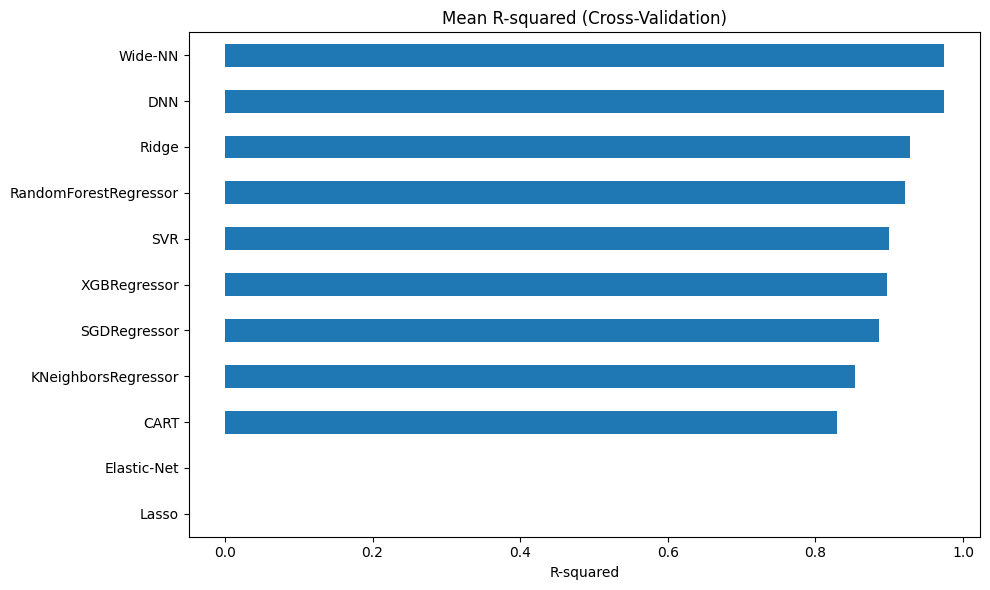

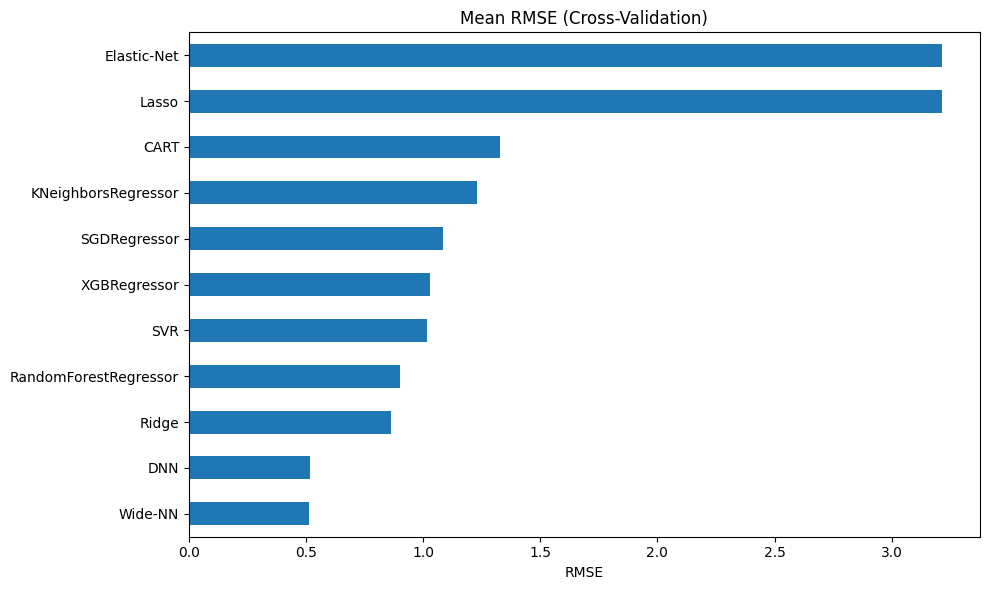

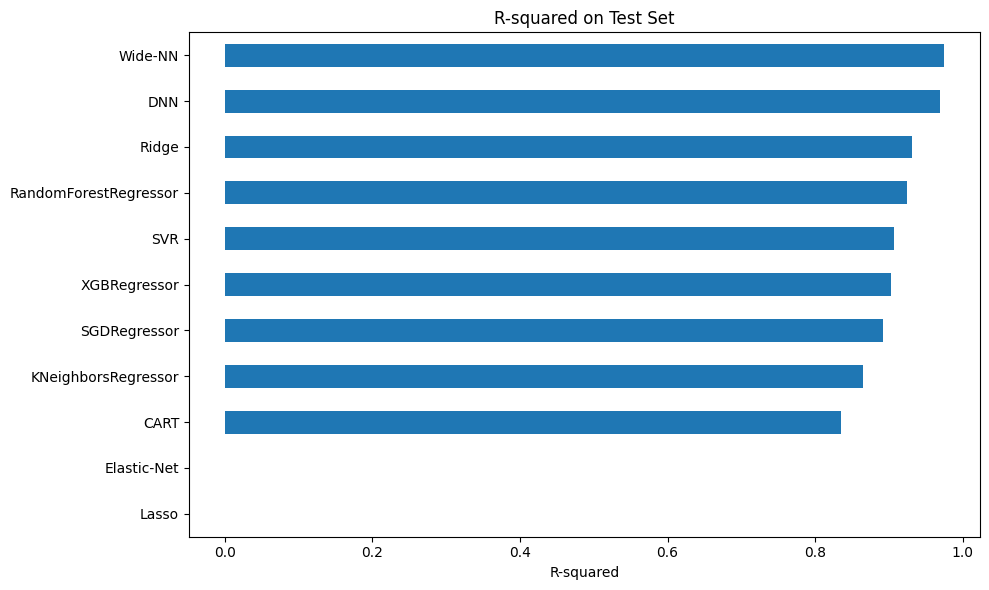

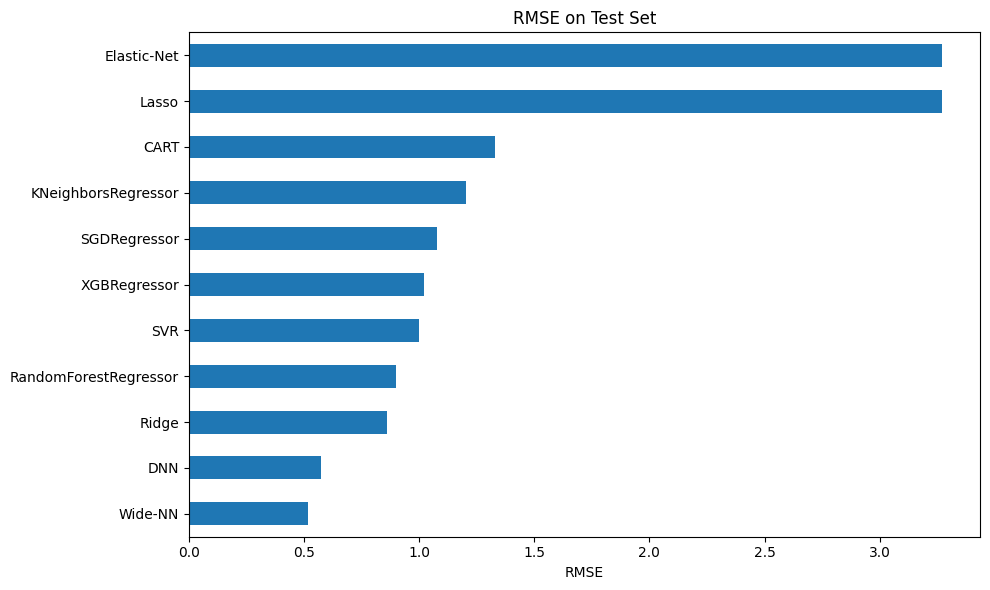

All models have been saved in the 'saved_models' directory.


In [9]:
# TRAINING
# MODELS ARE SAVED
# Hyperparamaters are original
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import joblib
import os

# Define the machine learning models
def create_models(input_shape):
    return {
        'RandomForestRegressor': RandomForestRegressor(random_state=42),
        'XGBRegressor': XGBRegressor(random_state=42),
        'KNeighborsRegressor': KNeighborsRegressor(),
        'SGDRegressor': SGDRegressor(random_state=42),
        'SVR': SVR(kernel='rbf'),
        'Ridge': Ridge(random_state=42),
        'DNN': Sequential([
            Input(shape=(input_shape,)),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(1)
        ]),
        'Wide-NN': Sequential([
            Input(shape=(input_shape,)),
            Dense(input_shape, activation='relu'),
            Dense(1)
        ]),
        'Lasso': Lasso(random_state=42),
        'Elastic-Net': ElasticNet(random_state=42),
        'CART': DecisionTreeRegressor(random_state=42)
    }

# Initialize dictionaries to store metrics
cv_metrics = {model_name: {metric: [] for metric in ['MAE', 'RMSE', 'Explained Variance', 'R-squared', 'MSE']} 
              for model_name in create_models(0).keys()}

# Create a directory to store the models if it doesn't exist
os.makedirs('saved_models', exist_ok=True)

# Perform 8-fold cross-validation
for fold, (train_data, val_data) in enumerate(zip(fold_train_data, fold_val_data), 1):
    print(f"Processing fold {fold}")

    X_train = train_data.iloc[:, :-1].values  # Convert to NumPy array
    y_train = train_data.iloc[:, -1].values    # Convert to NumPy array
    X_val = val_data.iloc[:, :-1].values        # Convert to NumPy array
    y_val = val_data.iloc[:, -1].values          # Convert to NumPy array

    models = create_models(X_train.shape[1])

    for name, model in models.items():
        if name in ['DNN', 'Wide-NN']:
            model.compile(optimizer=Adam(), loss='mse')
            model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
            # Save Keras model
            model.save(f'saved_models/{name}_fold_{fold}.h5')
        else:
            model.fit(X_train, y_train)
            # Save scikit-learn model
            joblib.dump(model, f'saved_models/{name}_fold_{fold}.joblib')

        # Evaluate on validation set
        y_pred_val = model.predict(X_val)

        # Calculate metrics
        mae_val = mean_absolute_error(y_val, y_pred_val)
        rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)
        ev_val = explained_variance_score(y_val, y_pred_val)
        r2_val = r2_score(y_val, y_pred_val)
        mse_val = mean_squared_error(y_val, y_pred_val)

        # Store metrics
        cv_metrics[name]['MAE'].append(mae_val)
        cv_metrics[name]['RMSE'].append(rmse_val)
        cv_metrics[name]['Explained Variance'].append(ev_val)
        cv_metrics[name]['R-squared'].append(r2_val)
        cv_metrics[name]['MSE'].append(mse_val)

# Calculate mean and standard deviation of cross-validation metrics
mean_cv_metrics = {model: {metric: np.mean(values) for metric, values in metrics.items()} 
                   for model, metrics in cv_metrics.items()}
std_cv_metrics = {model: {metric: np.std(values) for metric, values in metrics.items()} 
                  for model, metrics in cv_metrics.items()}

# Display cross-validation metrics
mean_cv_metrics_df = pd.DataFrame.from_dict(mean_cv_metrics, orient='index')
std_cv_metrics_df = pd.DataFrame.from_dict(std_cv_metrics, orient='index')

print("Mean Cross-Validation Metrics:")
print(mean_cv_metrics_df)
print("\nStandard Deviation of Cross-Validation Metrics:")
print(std_cv_metrics_df)

# Evaluate on test set
X_test = data_test_final.iloc[:, :-1].values  # Convert to NumPy array
y_test = data_test_final.iloc[:, -1].values    # Convert to NumPy array

test_metrics = {}
for name, model in models.items():
    y_pred_test = model.predict(X_test)
    
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    ev_test = explained_variance_score(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    test_metrics[name] = {
        'MAE': mae_test,
        'RMSE': rmse_test,
        'Explained Variance': ev_test,
        'R-squared': r2_test,
        'MSE': mse_test
    }

# Display test metrics
test_metrics_df = pd.DataFrame.from_dict(test_metrics, orient='index')
print("\nTest Set Metrics:")
print(test_metrics_df)

# Plotting functions
def plot_metric(df, metric, title):
    plt.figure(figsize=(10, 6))
    df[metric].sort_values(ascending=True).plot(kind='barh')
    plt.title(title)
    plt.xlabel(metric)
    plt.tight_layout()
    plt.show()

# Plot cross-validation metrics
plot_metric(mean_cv_metrics_df, 'R-squared', 'Mean R-squared (Cross-Validation)')
plot_metric(mean_cv_metrics_df, 'RMSE', 'Mean RMSE (Cross-Validation)')

# Plot test metrics
plot_metric(test_metrics_df, 'R-squared', 'R-squared on Test Set')
plot_metric(test_metrics_df, 'RMSE', 'RMSE on Test Set')

# Save final models trained on the entire training set
X_train_full = data_train_final.iloc[:, :-1].values
y_train_full = data_train_final.iloc[:, -1].values

final_models = create_models(X_train_full.shape[1])

for name, model in final_models.items():
    if name in ['DNN', 'Wide-NN']:
        model.compile(optimizer=Adam(), loss='mse')
        model.fit(X_train_full, y_train_full, epochs=100, batch_size=32, verbose=0)
        # Save final Keras model
        model.save(f'saved_models/{name}_final.h5')
    else:
        model.fit(X_train_full, y_train_full)
        # Save final scikit-learn model
        joblib.dump(model, f'saved_models/{name}_final.joblib')

print("All models have been saved in the 'saved_models' directory.")

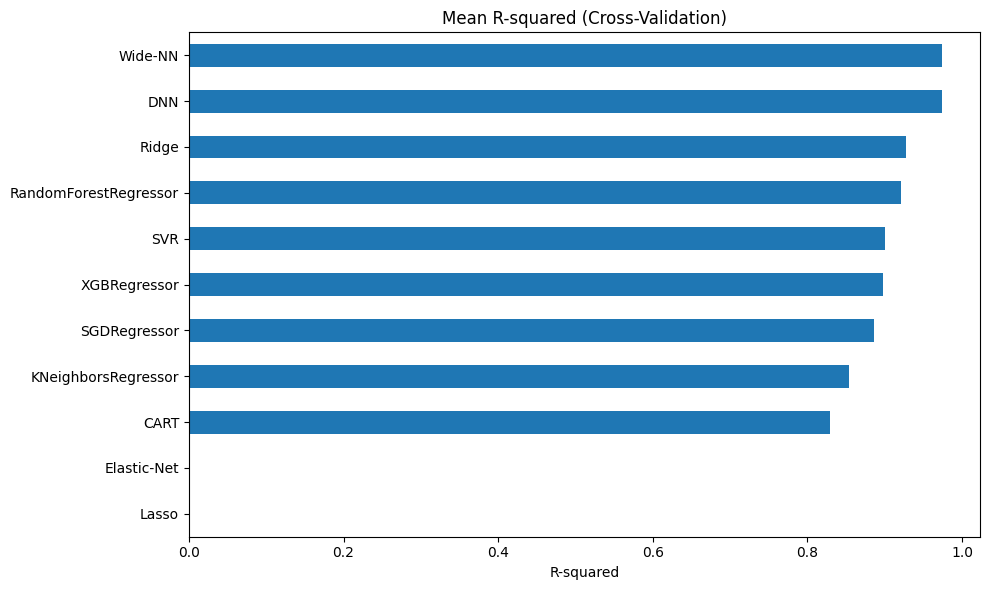

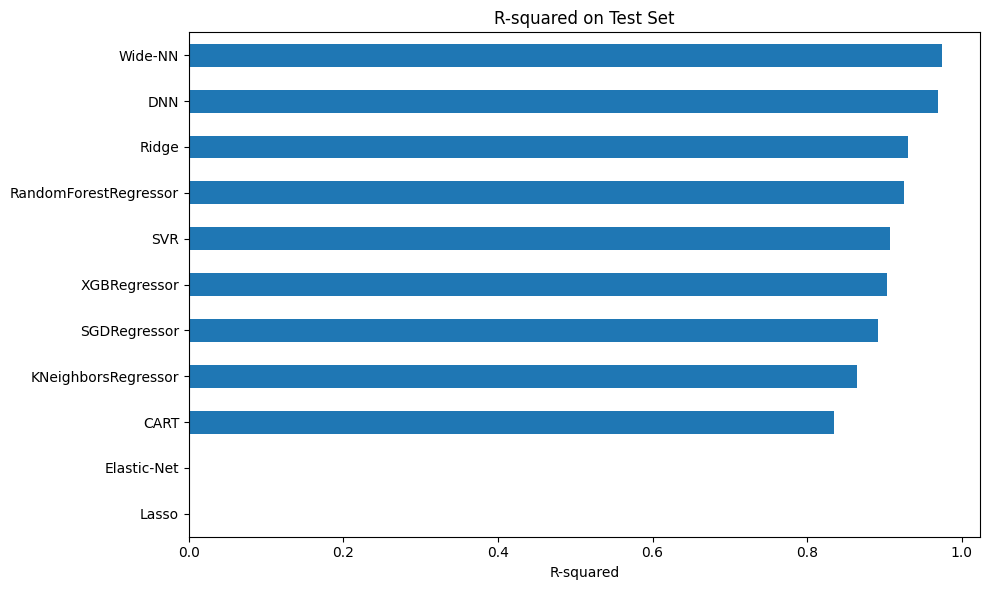

In [33]:
##### REDRAWING VALIDATION METRICS PLOTS - REMOVING THE UNWATED MARGIN TO THE LEFT R-SQUARED COMPARISON PLOTS
import matplotlib.pyplot as plt

# Plotting functions
def plot_metric(df, metric, title):
    plt.figure(figsize=(10, 6))
    df[metric].sort_values(ascending=True).plot(kind='barh')
    plt.title(title)
    plt.xlabel(metric)
    
    # Adjust x-axis limits to remove unwanted margin
    plt.xlim(left=0)  # Set the left limit to 0 or a small value if needed

    # Optionally adjust subplot parameters for tighter layout
    plt.subplots_adjust(left=0.1)  # Adjust left margin if necessary

    plt.tight_layout()
    plt.show()

# Plot cross-validation metrics
plot_metric(mean_cv_metrics_df, 'R-squared', 'Mean R-squared (Cross-Validation)')

# Plot test metrics
plot_metric(test_metrics_df, 'R-squared', 'R-squared on Test Set')

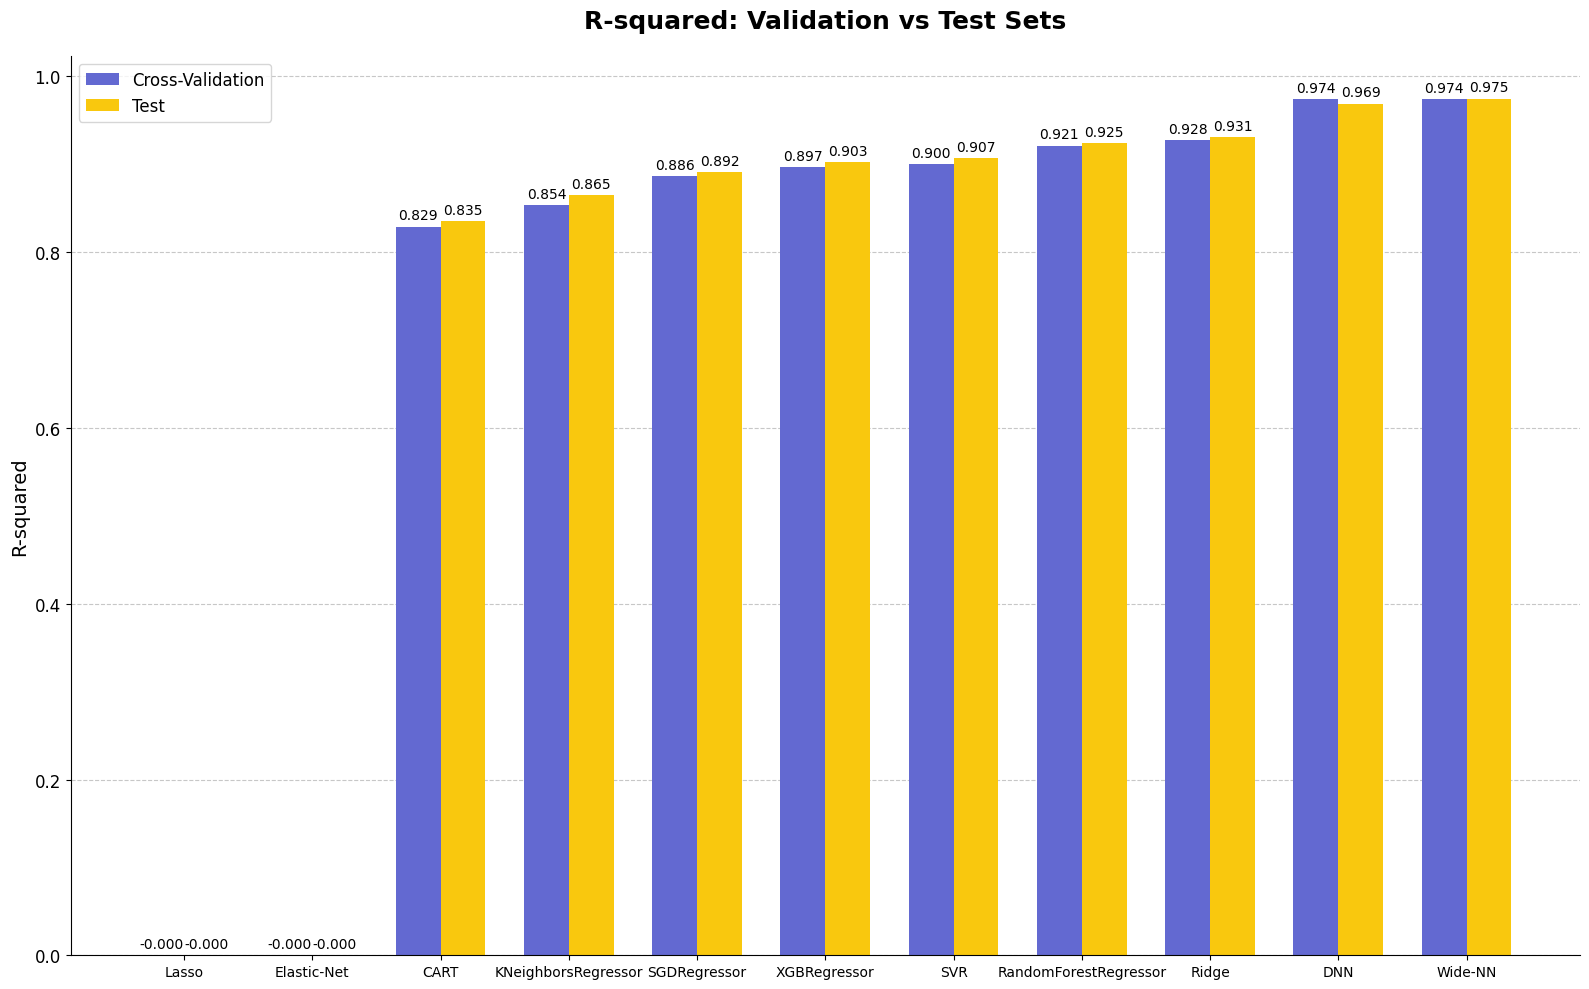

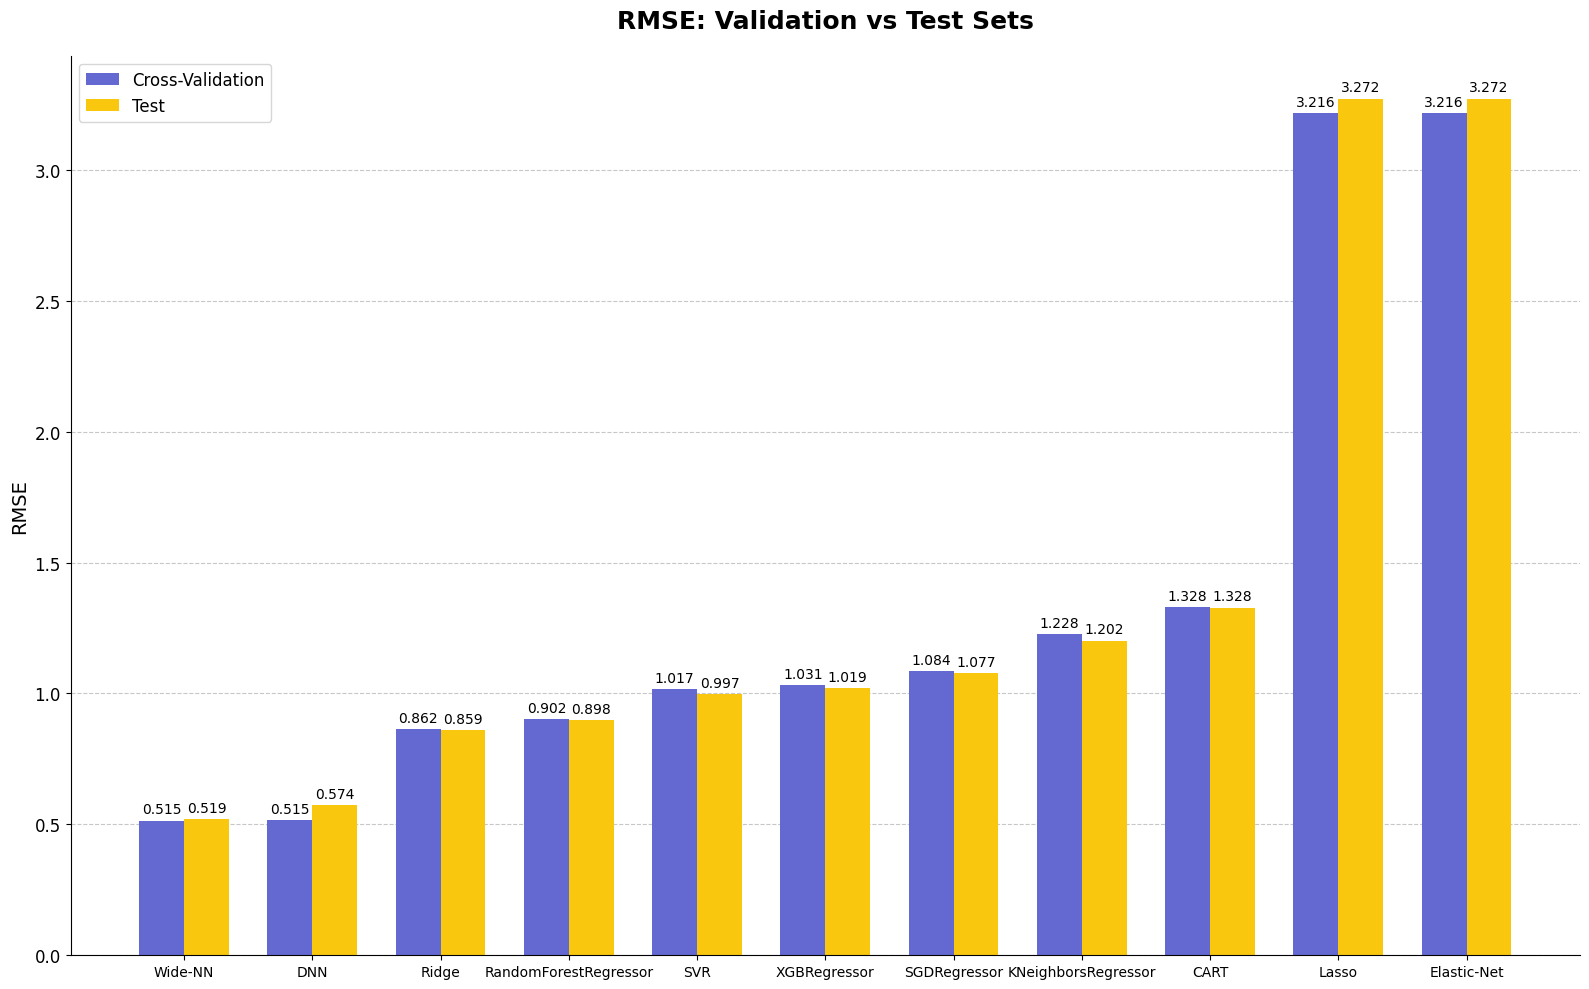

In [148]:
##### R-SQUARED SCORES BAR CHART - VALIDATION VS TEST SET
##### RMSE SCORES BAR CHART - VALIDATION VS TEST SET
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_stacked_bar_chart(cv_df, test_df, metric, title):
    plt.style.use('default')  # Set to default style for a white background
    
    combined_df = pd.DataFrame({
        'Cross-Validation': cv_df[metric],
        'Test': test_df[metric]
    })
    
    combined_df = combined_df.sort_values(by='Cross-Validation', ascending=True)
    
    models = combined_df.index
    cv_values = combined_df['Cross-Validation']
    test_values = combined_df['Test']
    
    x = np.arange(len(models))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(16, 10))
    rects1 = ax.bar(x - width/2, cv_values, width, label='Cross-Validation', color='#6369D1')
    rects2 = ax.bar(x + width/2, test_values, width, label='Test', color='#F9C80E')
    
    ax.set_ylabel(metric, fontsize=14)
    ax.set_title(title, fontsize=18, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(models, fontsize=10, ha='center')
    ax.legend(fontsize=12)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', which='major', labelsize=12)
    
    # Remove the bottom margin
    ax.set_ylim(bottom=0)
    
    # Add grid
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Horizontal grid lines
    ax.set_axisbelow(True)  # Ensure grid lines are below the bars

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.3f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

    autolabel(rects1)
    autolabel(rects2)
    
    plt.tight_layout()
    
    plt.show()

# Create R-squared chart
create_stacked_bar_chart(mean_cv_metrics_df, test_metrics_df, 'R-squared', 'R-squared: Validation vs Test Sets')

# Create RMSE chart
create_stacked_bar_chart(mean_cv_metrics_df, test_metrics_df, 'RMSE', 'RMSE: Validation vs Test Sets')

Top 10 drug combinations by R2 score:
      Anchor_Drug Library_Drug  R2_Score
446     Lapatinib    SCH772984  0.999211
220    Trametinib   Dactolisib  0.997300
519        LGK974      AZD7762  0.996614
490  Galunisertib  Palbociclib  0.995547
488     Erlotinib    Sorafenib  0.995351
631  Galunisertib   Paclitaxel  0.994711
552    Navitoclax      OSI-027  0.994429
230       MK-2206   Dactolisib  0.994337
539        LGK974    Lapatinib  0.994304
71    Palbociclib    Dasatinib  0.993765

Best drug combination: Lapatinib and SCH772984
Highest R2 score: 0.9992110178166634


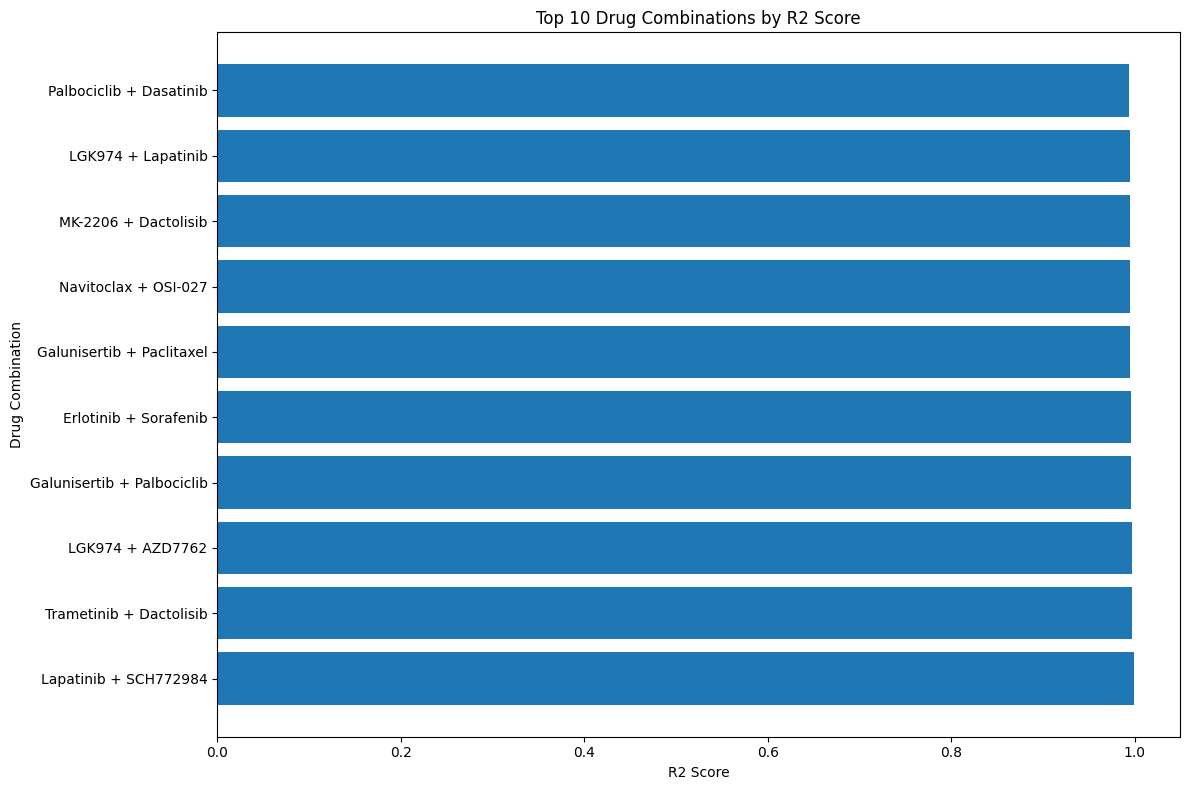

In [17]:
##### TOP 10 ANCHOR-LIBRARY DRUG COMBINATIONS WITH THE HIGHEST R2 VALUES
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from IPython.display import clear_output

# Assuming 'DNN' is your best performing model, but you can change this if needed
best_model = models['Wide-NN']

# Get the column names from the original DataFrame
original_columns = data_val_final.columns[:-1]  # Exclude the target column

# Find the indices of anchor and library columns
anchor_indices = [i for i, col in enumerate(original_columns) if col.startswith("Anchor Name_")]
library_indices = [i for i, col in enumerate(original_columns) if col.startswith("Library Name_")]

# Function to get drug name from one-hot encoded vector
def get_drug_name(vector, indices, original_columns):
    index = indices[np.argmax(vector[indices])]
    return original_columns[index]

# Dictionary to store predictions and actual values for each drug combination
combination_data = defaultdict(lambda: {'y_true': [], 'y_pred': []})

# Iterate through the validation set
for i in range(len(X_val)):
    # Get the active anchor and library drugs
    anchor_drug = get_drug_name(X_val[i], anchor_indices, original_columns)
    library_drug = get_drug_name(X_val[i], library_indices, original_columns)
        
    # Make prediction
    y_pred = best_model.predict(X_val[i].reshape(1, -1))[0]
        
    # Store the prediction and actual value
    combination_data[(anchor_drug, library_drug)]['y_true'].append(y_val[i])
    combination_data[(anchor_drug, library_drug)]['y_pred'].append(y_pred)
    clear_output(wait=True)

# Calculate R2 scores for each combination
r2_scores = {}
for combination, data in combination_data.items():
    if len(data['y_true']) > 1:  # Only calculate R2 if we have more than one sample
        r2 = r2_score(data['y_true'], data['y_pred'])
        r2_scores[combination] = r2

# Convert to DataFrame and sort
r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Drug_Combination', 'R2_Score'])
r2_df['Anchor_Drug'] = r2_df['Drug_Combination'].apply(lambda x: x[0].replace("Anchor Name_", ""))
r2_df['Library_Drug'] = r2_df['Drug_Combination'].apply(lambda x: x[1].replace("Library Name_", ""))
r2_df = r2_df.sort_values('R2_Score', ascending=False)

# Display top 10 drug combinations
print("Top 10 drug combinations by R2 score:")
print(r2_df[['Anchor_Drug', 'Library_Drug', 'R2_Score']].head(10))

# The top row will have the drug combination with the highest R2 value
best_combination = r2_df.iloc[0]
print(f"\nBest drug combination: {best_combination['Anchor_Drug']} and {best_combination['Library_Drug']}")
print(f"Highest R2 score: {best_combination['R2_Score']}")

# Visualize top 10 combinations
plt.figure(figsize=(12, 8))
top_10 = r2_df.head(10)
plt.barh(top_10['Anchor_Drug'] + ' + ' + top_10['Library_Drug'], top_10['R2_Score'])
plt.title('Top 10 Drug Combinations by R2 Score')
plt.xlabel('R2 Score')
plt.ylabel('Drug Combination')
plt.tight_layout()
plt.show()

Top 10 drug combinations by R2 score:
      Anchor Drug        Anchor Target        Anchor Pathway Library Drug  \
446     Lapatinib          EGFR, ERBB2        EGFR signaling    SCH772984   
220    Trametinib           MEK1, MEK2    ERK MAPK signaling   Dactolisib   
519        LGK974                PORCN         WNT signaling      AZD7762   
490  Galunisertib               TGFBR1         RTK signaling  Palbociclib   
488     Erlotinib                 EGFR        EGFR signaling    Sorafenib   
631  Galunisertib               TGFBR1         RTK signaling   Paclitaxel   
552    Navitoclax  BCL2, BCL-XL, BCL-W  Apoptosis regulation      OSI-027   
230       MK-2206           AKT1, AKT2   PI3K/MTOR signaling   Dactolisib   
539        LGK974                PORCN         WNT signaling    Lapatinib   
71    Palbociclib           CDK4, CDK6            Cell cycle    Dasatinib   

                     Library Target      Library Pathway  R2 Score  
446                      ERK1, ERK2   ERK MAP

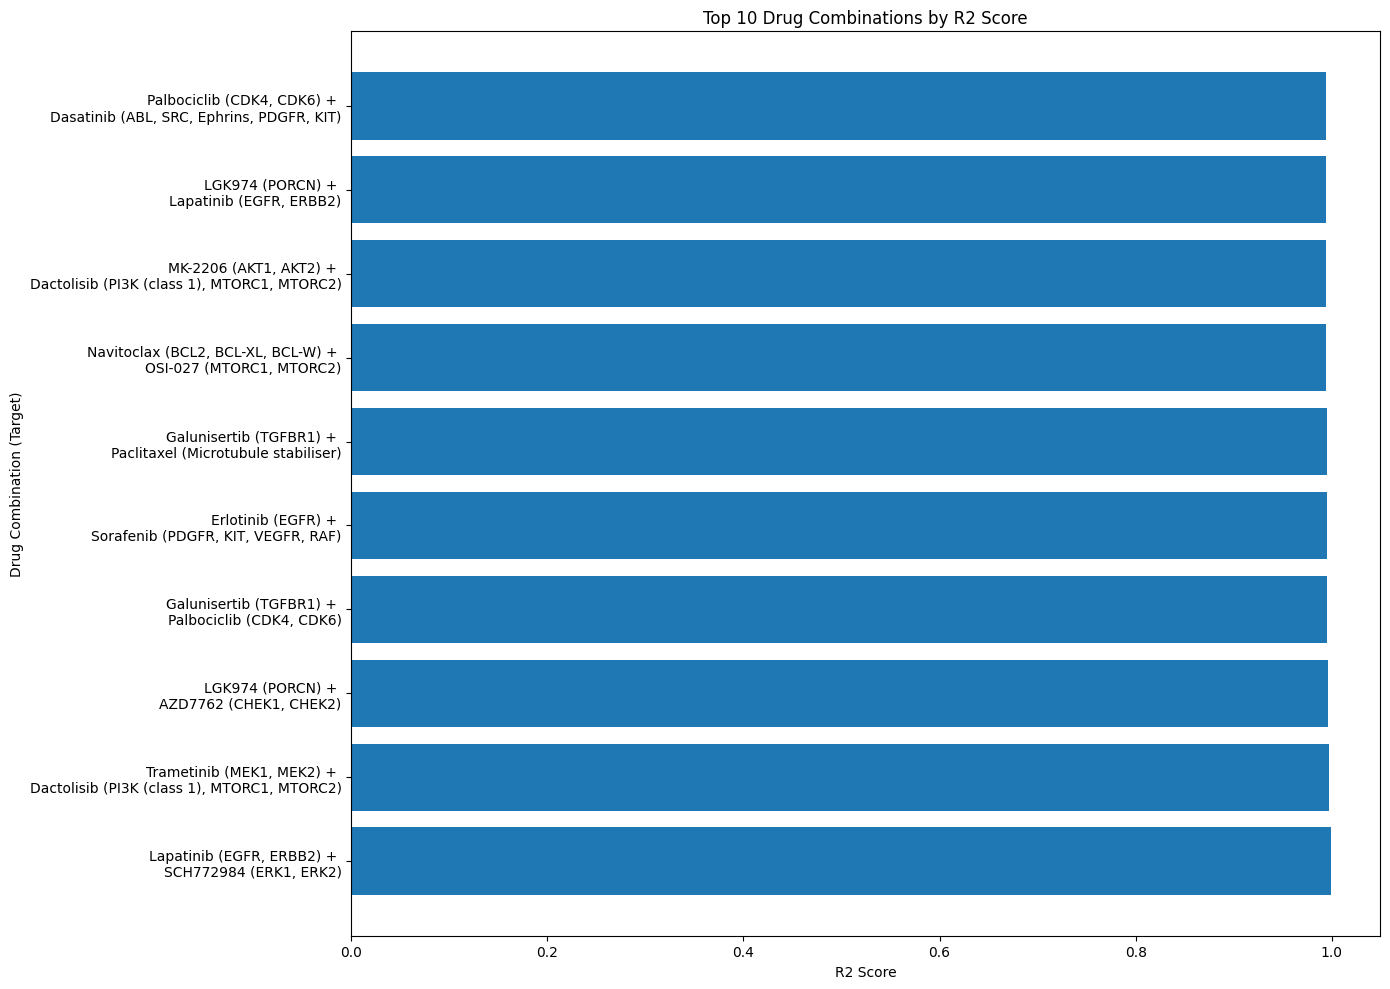

In [121]:
##### TOP 10 ANCHOR-LIBRARY DRUG COMBINATIONS WITH THE HIGHEST R2 VALUES + THEIR TARGET AND TARGET PATHWAYS
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from IPython.display import clear_output

# Assuming 'Wide-NN' is your best performing model, but you can change this if needed
best_model = models['Wide-NN']

# Get the column names from the original DataFrame
original_columns = data_val_final.columns[:-1]  # Exclude the target column

# Find the indices of anchor and library columns
anchor_indices = [i for i, col in enumerate(original_columns) if col.startswith("Anchor Name_")]
library_indices = [i for i, col in enumerate(original_columns) if col.startswith("Library Name_")]
anchor_target_indices = [i for i, col in enumerate(original_columns) if col.startswith("Anchor Target_")]
library_target_indices = [i for i, col in enumerate(original_columns) if col.startswith("library Target_")]
anchor_pathway_indices = [i for i, col in enumerate(original_columns) if col.startswith("Anchor Pathway_")]
library_pathway_indices = [i for i, col in enumerate(original_columns) if col.startswith(" Library Pathway_")]

# Function to get name from one-hot encoded vector
def get_name(vector, indices, original_columns):
    index = indices[np.argmax(vector[indices])]
    return original_columns[index].split('_', 1)[1]  # Remove the prefix

# Dictionary to store predictions and actual values for each drug combination
combination_data = defaultdict(lambda: {'y_true': [], 'y_pred': []})

# Iterate through the validation set
for i in range(len(X_val)):
    # Get the active anchor and library drugs, targets, and pathways
    anchor_drug = get_name(X_val[i], anchor_indices, original_columns)
    library_drug = get_name(X_val[i], library_indices, original_columns)
    anchor_target = get_name(X_val[i], anchor_target_indices, original_columns)
    library_target = get_name(X_val[i], library_target_indices, original_columns)
    anchor_pathway = get_name(X_val[i], anchor_pathway_indices, original_columns)
    library_pathway = get_name(X_val[i], library_pathway_indices, original_columns)
    
    # Make prediction
    y_pred = best_model.predict(X_val[i].reshape(1, -1))[0]
    
    # Store the prediction and actual value
    key = (anchor_drug, library_drug, anchor_target, library_target, anchor_pathway, library_pathway)
    combination_data[key]['y_true'].append(y_val[i])
    combination_data[key]['y_pred'].append(y_pred)
    clear_output(wait=True)

# Calculate R2 scores for each combination
r2_scores = {}
for combination, data in combination_data.items():
    if len(data['y_true']) > 1:  # Only calculate R2 if we have more than one sample
        r2 = r2_score(data['y_true'], data['y_pred'])
        r2_scores[combination] = r2

# Convert to DataFrame and sort
r2_df = pd.DataFrame([
    {
        'Anchor Drug': combo[0],
        'Library Drug': combo[1],
        'Anchor Target': combo[2],
        'Library Target': combo[3],
        'Anchor Pathway': combo[4],
        'Library Pathway': combo[5],
        'R2 Score': score
    }
    for combo, score in r2_scores.items()
])

r2_df = r2_df.sort_values('R2 Score', ascending=False)

# Display top 10 drug combinations
print("Top 10 drug combinations by R2 score:")
print(r2_df[['Anchor Drug', 'Anchor Target', 'Anchor Pathway', 
             'Library Drug', 'Library Target', 'Library Pathway', 'R2 Score']].head(10))

# The top row will have the drug combination with the highest R2 value
best_combination = r2_df.iloc[0]
print(f"\nBest drug combination: {best_combination['Anchor Drug']} and {best_combination['Library Drug']}")
print(f"Highest R2 score: {best_combination['R2 Score']}")
print(f"Anchor Drug Target: {best_combination['Anchor Target']}")
print(f"Anchor Drug Pathway: {best_combination['Anchor Pathway']}")
print(f"Library Drug Target: {best_combination['Library Target']}")
print(f"Library Drug Pathway: {best_combination['Library Pathway']}")

# Visualize top 10 combinations
plt.figure(figsize=(14, 10))
top_10 = r2_df.head(10)
labels = [f"{row['Anchor Drug']} ({row['Anchor Target']}) + \n{row['Library Drug']} ({row['Library Target']})" 
          for _, row in top_10.iterrows()]
plt.barh(labels, top_10['R2 Score'])
plt.title('Top 10 Drug Combinations by R2 Score')
plt.xlabel('R2 Score')
plt.ylabel('Drug Combination (Target)')
plt.tight_layout()
plt.show()

In [161]:
r2_df.head(10)

,Anchor Drug,Library Drug,Anchor Target,Library Target,Anchor Pathway,Library Pathway,R2 Score
446,Lapatinib,SCH772984,"EGFR, ERBB2","ERK1, ERK2",EGFR signaling,ERK MAPK signaling,0.999211
220,Trametinib,Dactolisib,"MEK1, MEK2","PI3K (class 1), MTORC1, MTORC2",ERK MAPK signaling,PI3K/MTOR signaling,0.997300
519,LGK974,AZD7762,PORCN,"CHEK1, CHEK2",WNT signaling,Cell cycle,0.996614
490,Galunisertib,Palbociclib,TGFBR1,"CDK4, CDK6",RTK signaling,Cell cycle,0.995547
488,Erlotinib,Sorafenib,EGFR,"PDGFR, KIT, VEGFR, RAF",EGFR signaling,"Other, kinases",0.995351
631,Galunisertib,Paclitaxel,TGFBR1,Microtubule stabiliser,RTK signaling,Mitosis,0.994711
552,Navitoclax,OSI-027,"BCL2, BCL-XL, BCL-W","MTORC1, MTORC2",Apoptosis regulation,PI3K/MTOR signaling,0.994429
230,MK-2206,Dactolisib,"AKT1, AKT2","PI3K (class 1), MTORC1, MTORC2",PI3K/MTOR signaling,PI3K/MTOR signaling,0.994337
539,LGK974,Lapatinib,PORCN,"EGFR, ERBB2",WNT signaling,EGFR signaling,0.994304
71,Palbociclib,Dasatinib,"CDK4, CDK6","ABL, SRC, Ephrins, PDGFR, KIT",Cell cycle,"Other, kinases",0.993765


In [ ]:
##### GENERATING REGRESSION PLOTS FOR THE TOP 10 COMBINATIONS 
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create regression plots
def plot_regression(ax, x, y, title):
    sns.regplot(x=x, y=y, ax=ax, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    ax.set_title(title)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')

# Get the top 10 drug combinations
top_10_combinations = r2_df.head(10)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 25))
fig.suptitle('Top 10 Drug Combinations by R2 Score', fontsize=16)

# Plot each combination
for i, (index, row) in enumerate(top_10_combinations.iterrows()):
    ax = axes[i // 2, i % 2]
    combination = row['Drug_Combination']
    y_true = combination_data[combination]['y_true']
    y_pred = combination_data[combination]['y_pred']
    title = f"{row['Anchor_Drug']} + {row['Library_Drug']} (R2: {row['R2_Score']})"
    plot_regression(ax, y_true, y_pred, title)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


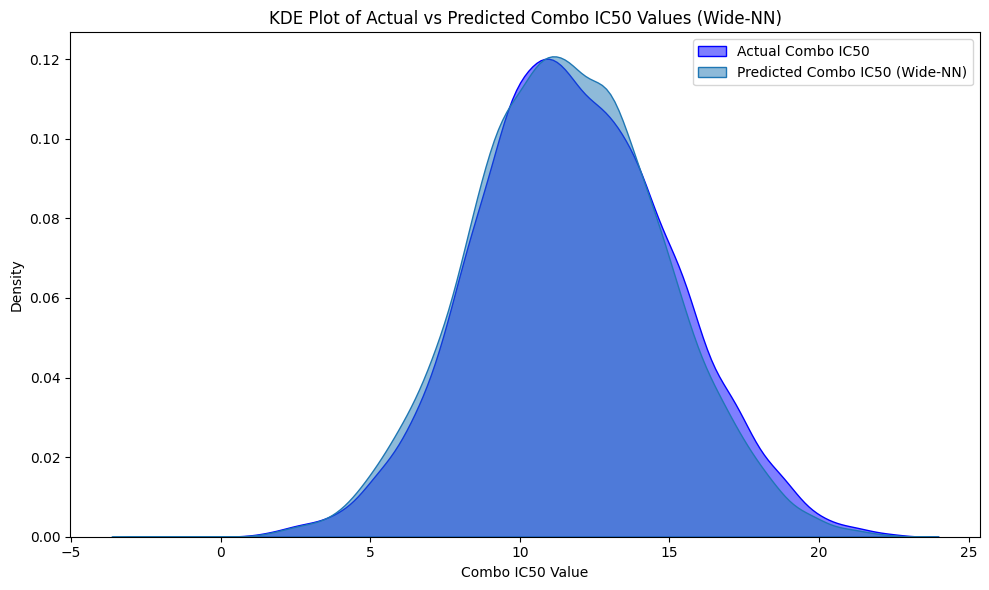

In [157]:
##### GENERATING KDE PLOT - COMPARISON OF ACTUAL VS PREDICTED COMBO IC50 VALUES
import seaborn as sns

# After evaluating the DNN model on the test set
# Assuming y_test contains the actual values and y_pred_test contains the predicted values from the DNN model

# Store predictions from the DNN model
y_pred_test = models['Wide-NN'].predict(X_test)

# KDE Plot for Actual vs Predicted Combo IC50 Values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Combo IC50', color='blue', fill=True, alpha=0.5)
sns.kdeplot(y_pred_test, label='Predicted Combo IC50 (Wide-NN)', color='yellow', fill=True, alpha=0.5)
plt.xlabel('Combo IC50 Value')
plt.ylabel('Density')
plt.title('KDE Plot of Actual vs Predicted Combo IC50 Values (Wide-NN)')
plt.legend()
plt.tight_layout()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━

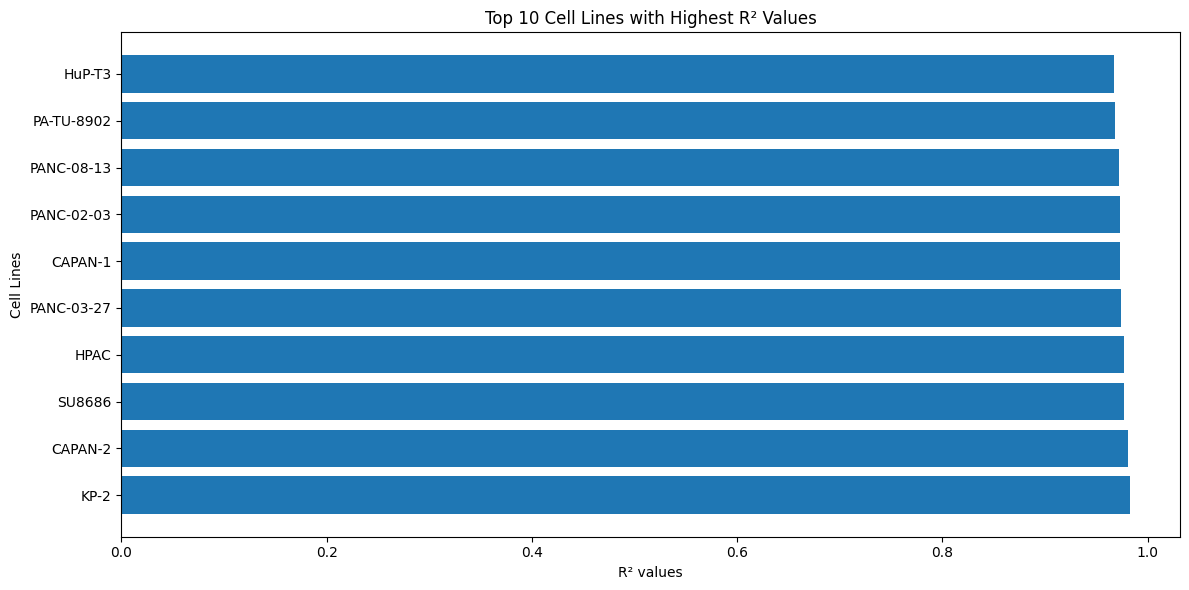

In [24]:
##### TOP CELL LINES WITH HIGHEST R2 VALUES
from sklearn.metrics import r2_score

# Assuming your Wide-NN model is already trained and stored in the 'models' dictionary
wide_nn_model = models['Wide-NN']

# Get the column names that start with "Cell Line Name_"
cell_line_columns = [col for col in data_test_final.columns if col.startswith("Cell Line name_")]

# Dictionary to store R² scores for each cell line
cell_line_r2_scores = {}

# Iterate through each cell line
for cell_line in cell_line_columns:
    # Filter the test data for this cell line
    cell_line_mask = data_test_final[cell_line] == 1
    X_test_cell_line = X_test[cell_line_mask]
    y_test_cell_line = y_test[cell_line_mask]
    
    # Predict using the Wide-NN model
    y_pred_cell_line = wide_nn_model.predict(X_test_cell_line)
    
    # Calculate R² score
    r2 = r2_score(y_test_cell_line, y_pred_cell_line)
    
    # Store the R² score
    cell_line_r2_scores[cell_line.replace("Cell Line name_", "")] = r2

# Sort the cell lines by R² score in descending order
sorted_cell_lines = sorted(cell_line_r2_scores.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 cell lines
top_10_cell_lines = sorted_cell_lines[:10]

# Print the results
print("\nTop 10 Cell Lines with Highest R² Values:")
for i, (cell_line, r2) in enumerate(top_10_cell_lines, 1):
    print(f"{i}. {cell_line}: R² = {r2:.4f}")

# Optionally, you can create a bar plot of the top 10 cell lines
plt.figure(figsize=(12, 6))
cell_lines, r2_scores = zip(*top_10_cell_lines)
plt.barh(cell_lines, r2_scores)
plt.title("Top 10 Cell Lines with Highest R² Values")
plt.xlabel("R² values")
plt.ylabel("Cell Lines")
plt.tight_layout()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8/8 ━━━━━━━━━━━━━━

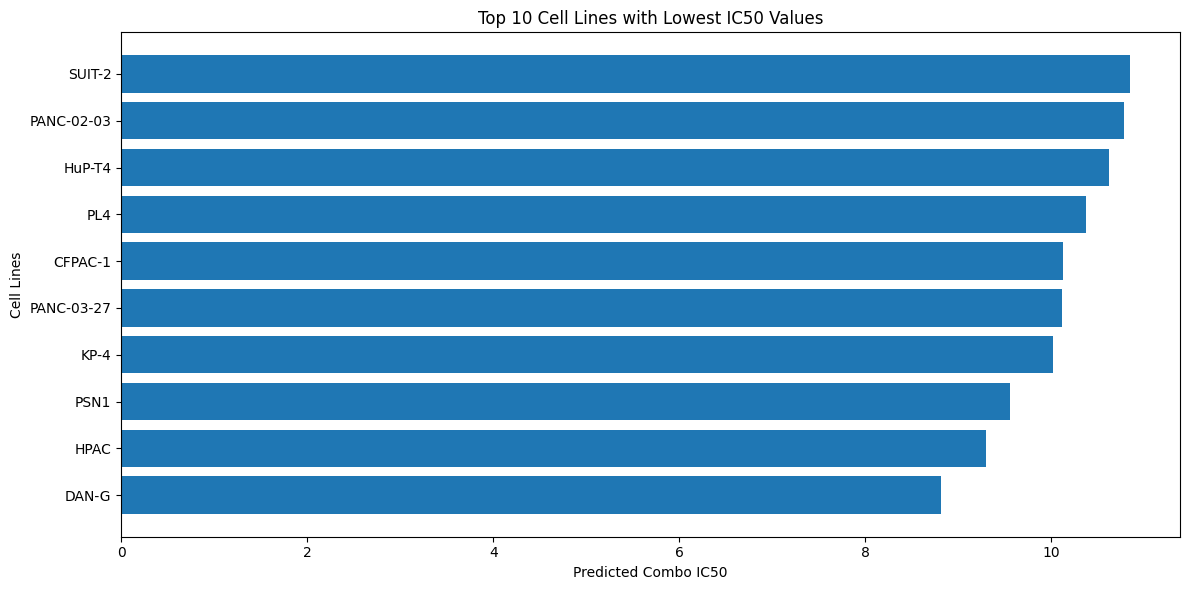

In [26]:
##### TOP CELL LINES WITH LOWEST IC50 VALUES
from sklearn.metrics import r2_score
import numpy as np

# Assuming your Wide-NN model is already trained and stored in the 'models' dictionary
wide_nn_model = models['Wide-NN']

# Get the column names that start with "Cell Line name_"
cell_line_columns = [col for col in data_test_final.columns if col.startswith("Cell Line name_")]

# Dictionary to store mean IC50 values for each cell line
cell_line_ic50_means = {}

# Iterate through each cell line
for cell_line in cell_line_columns:
    # Filter the test data for this cell line
    cell_line_mask = data_test_final[cell_line] == 1
    X_test_cell_line = X_test[cell_line_mask]
    y_test_cell_line = y_test[cell_line_mask]
    
    # Predict using the Wide-NN model
    y_pred_cell_line = wide_nn_model.predict(X_test_cell_line)
    
    # Calculate mean IC50 value
    mean_ic50 = np.mean(y_pred_cell_line)
    
    # Store the mean IC50 value
    cell_line_ic50_means[cell_line.replace("Cell Line name_", "")] = mean_ic50

# Sort the cell lines by mean IC50 value in ascending order
sorted_cell_lines_ic50 = sorted(cell_line_ic50_means.items(), key=lambda x: x[1])

# Get the top 10 cell lines with lowest IC50 values
top_10_cell_lines_lowest_ic50 = sorted_cell_lines_ic50[:10]

# Print the results
print("\nTop 10 Cell Lines with Lowest IC50 Values:")
for i, (cell_line, ic50) in enumerate(top_10_cell_lines_lowest_ic50, 1):
    print(f"{i}. {cell_line}: Mean IC50 = {ic50:.4f}")

# Create a bar plot of the top 10 cell lines with lowest IC50 values
plt.figure(figsize=(12, 6))
cell_lines, ic50_values = zip(*top_10_cell_lines_lowest_ic50)
plt.barh(cell_lines, ic50_values)
plt.title("Top 10 Cell Lines with Lowest IC50 Values")
plt.xlabel("Predicted Combo IC50")
plt.ylabel("Cell Lines")
plt.tight_layout()
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


  0%|                                                                                           | 0/48 [00:00<?, ?it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  2%|█▋                                                                                 | 1/48 [00:00<00:06,  7.68it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


  4%|███▍                                                                               | 2/48 [00:00<00:06,  6.58it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


  6%|█████▏                                                                             | 3/48 [00:00<00:06,  6.68it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  8%|██████▉                                                                            | 4/48 [00:00<00:06,  6.66it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 10%|████████▋                                                                          | 5/48 [00:00<00:06,  6.91it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 12%|██████████▍                                                                        | 6/48 [00:00<00:06,  6.39it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 15%|████████████                                                                       | 7/48 [00:01<00:06,  6.67it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 17%|█████████████▊                                                                     | 8/48 [00:01<00:06,  6.15it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 19%|███████████████▌                                                                   | 9/48 [00:01<00:06,  6.19it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 21%|█████████████████                                                                 | 10/48 [00:01<00:05,  6.78it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 23%|██████████████████▊                                                               | 11/48 [00:01<00:05,  7.24it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 25%|████████████████████▌                                                             | 12/48 [00:01<00:05,  7.05it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 27%|██████████████████████▏                                                           | 13/48 [00:01<00:04,  7.13it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 29%|███████████████████████▉                                                          | 14/48 [00:02<00:05,  6.73it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 31%|█████████████████████████▋                                                        | 15/48 [00:02<00:05,  6.50it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 33%|███████████████████████████▎                                                      | 16/48 [00:02<00:04,  6.58it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 35%|█████████████████████████████                                                     | 17/48 [00:02<00:04,  6.77it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 38%|██████████████████████████████▊                                                   | 18/48 [00:02<00:04,  6.56it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 40%|████████████████████████████████▍                                                 | 19/48 [00:02<00:04,  6.40it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 42%|██████████████████████████████████▏                                               | 20/48 [00:02<00:04,  6.99it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 44%|███████████████████████████████████▉                                              | 21/48 [00:03<00:03,  7.35it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 46%|█████████████████████████████████████▌                                            | 22/48 [00:03<00:03,  7.24it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 48%|███████████████████████████████████████▎                                          | 23/48 [00:03<00:03,  6.94it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 50%|█████████████████████████████████████████                                         | 24/48 [00:03<00:03,  6.87it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 52%|██████████████████████████████████████████▋                                       | 25/48 [00:03<00:03,  7.16it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 54%|████████████████████████████████████████████▍                                     | 26/48 [00:03<00:02,  7.39it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 56%|██████████████████████████████████████████████▏                                   | 27/48 [00:03<00:03,  6.64it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 58%|███████████████████████████████████████████████▊                                  | 28/48 [00:04<00:03,  6.06it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 60%|█████████████████████████████████████████████████▌                                | 29/48 [00:04<00:03,  6.28it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 62%|███████████████████████████████████████████████████▎                              | 30/48 [00:04<00:02,  6.33it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 65%|████████████████████████████████████████████████████▉                             | 31/48 [00:04<00:02,  6.45it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 67%|██████████████████████████████████████████████████████▋                           | 32/48 [00:04<00:02,  6.55it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step


 69%|████████████████████████████████████████████████████████▍                         | 33/48 [00:04<00:02,  7.02it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 71%|██████████████████████████████████████████████████████████                        | 34/48 [00:05<00:02,  6.80it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 73%|███████████████████████████████████████████████████████████▊                      | 35/48 [00:05<00:01,  6.68it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 75%|█████████████████████████████████████████████████████████████▌                    | 36/48 [00:05<00:01,  6.52it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 77%|███████████████████████████████████████████████████████████████▏                  | 37/48 [00:05<00:01,  6.07it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 79%|████████████████████████████████████████████████████████████████▉                 | 38/48 [00:05<00:01,  6.36it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 81%|██████████████████████████████████████████████████████████████████▋               | 39/48 [00:05<00:01,  6.75it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 83%|████████████████████████████████████████████████████████████████████▎             | 40/48 [00:05<00:01,  6.97it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 85%|██████████████████████████████████████████████████████████████████████            | 41/48 [00:06<00:00,  7.17it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 88%|███████████████████████████████████████████████████████████████████████▊          | 42/48 [00:06<00:00,  7.02it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 90%|█████████████████████████████████████████████████████████████████████████▍        | 43/48 [00:06<00:00,  7.16it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 92%|███████████████████████████████████████████████████████████████████████████▏      | 44/48 [00:06<00:00,  6.62it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 94%|████████████████████████████████████████████████████████████████████████████▉     | 45/48 [00:06<00:00,  6.71it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 46/48 [00:06<00:00,  6.76it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 47/48 [00:06<00:00,  6.91it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:07<00:00,  6.75it/s]


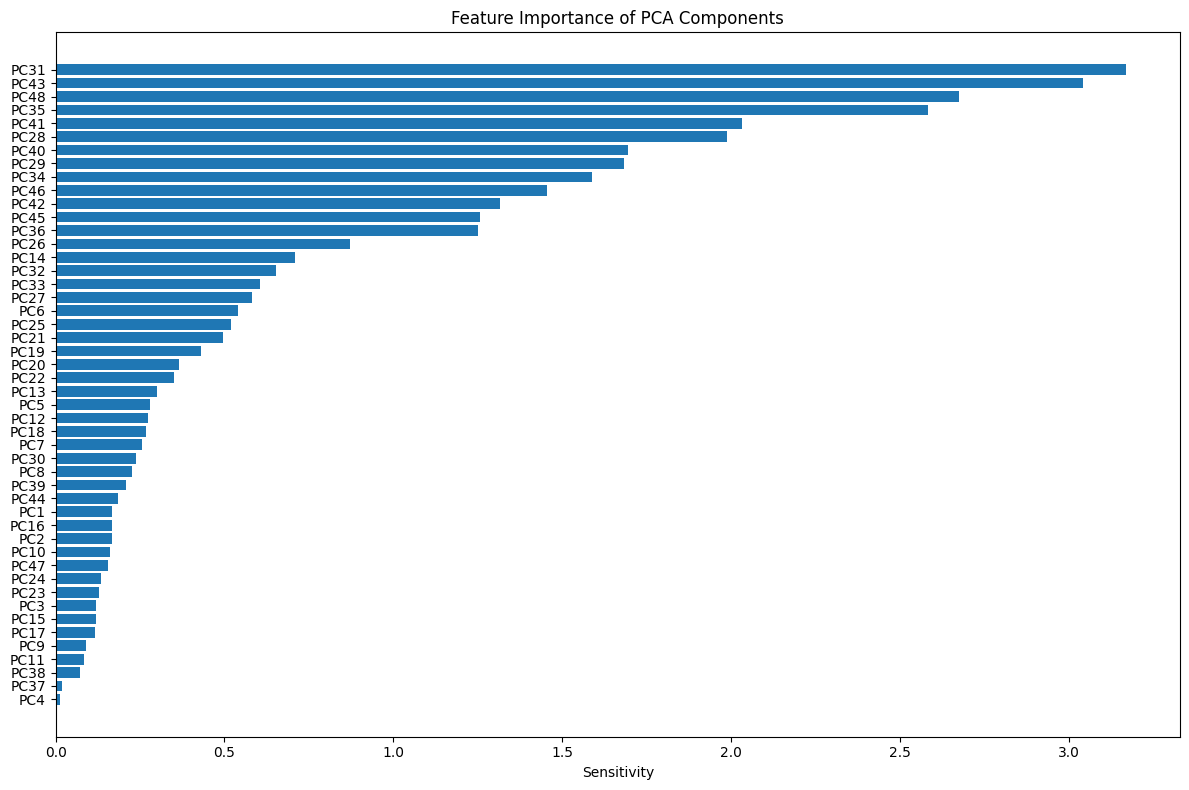

Top 10 most important PCA components:
1. PC31: 3.1715
2. PC43: 3.0435
3. PC48: 2.6762
4. PC35: 2.5839
5. PC41: 2.0334
6. PC28: 1.9880
7. PC40: 1.6964
8. PC29: 1.6822
9. PC34: 1.5889
10. PC46: 1.4541


In [114]:
##### SENSITIVITY ANALYSIS FOR FINDING OUT THE MOST IMPORTANT FEATURES [PCA COMPONENTS]
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def sensitivity_analysis(model, X, feature_indices, n_samples=1000):
    sensitivities = []
    
    # Use a subset of data for faster computation
    if X.shape[0] > n_samples:
        indices = np.random.choice(X.shape[0], n_samples, replace=False)
        X_sample = X[indices]
    else:
        X_sample = X
    
    base_prediction = model.predict(X_sample)
    
    for i in tqdm(feature_indices):
        X_modified = X_sample.copy()
        X_modified[:, i] = np.mean(X_sample[:, i])  # Set feature to its mean value
        new_prediction = model.predict(X_modified)
        sensitivity = np.mean(np.abs(new_prediction - base_prediction))
        sensitivities.append(sensitivity)
    
    return np.array(sensitivities)

# Assuming 'Wide-NN' is your best model and it's already trained
best_model = models['Wide-NN']

# Get feature names
feature_names = data_train_final.columns[:-1].tolist()

# Filter out only PCA components and get their indices
pca_columns = [col for col in feature_names if col.startswith('PC')]
pca_indices = [feature_names.index(col) for col in pca_columns]

# Ensure X_test is a numpy array
X_test_np = X_test if isinstance(X_test, np.ndarray) else X_test.values

# Perform sensitivity analysis
sensitivities = sensitivity_analysis(best_model, X_test_np, pca_indices)

# Sort features by importance
sorted_idx = np.argsort(sensitivities)
sorted_features = [pca_columns[i] for i in sorted_idx]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_features)), sensitivities[sorted_idx])
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Sensitivity')
plt.title('Feature Importance of PCA Components')
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("Top 10 most important PCA components:")
for i in range(1, 11):
    print(f"{i}. {sorted_features[-i]}: {sensitivities[sorted_idx[-i]]:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


  0%|                                                                                           | 0/48 [00:00<?, ?it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


  2%|█▋                                                                                 | 1/48 [00:00<00:07,  6.19it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


  4%|███▍                                                                               | 2/48 [00:00<00:07,  6.11it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


  6%|█████▏                                                                             | 3/48 [00:00<00:07,  6.04it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


  8%|██████▉                                                                            | 4/48 [00:00<00:06,  6.31it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 10%|████████▋                                                                          | 5/48 [00:00<00:06,  6.42it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 12%|██████████▍                                                                        | 6/48 [00:00<00:06,  6.05it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 15%|████████████                                                                       | 7/48 [00:01<00:07,  5.85it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 17%|█████████████▊                                                                     | 8/48 [00:01<00:06,  6.33it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 19%|███████████████▌                                                                   | 9/48 [00:01<00:06,  6.03it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 21%|█████████████████                                                                 | 10/48 [00:01<00:06,  6.06it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 23%|██████████████████▊                                                               | 11/48 [00:01<00:06,  5.88it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 25%|████████████████████▌                                                             | 12/48 [00:02<00:06,  5.63it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


 27%|██████████████████████▏                                                           | 13/48 [00:02<00:05,  6.11it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 29%|███████████████████████▉                                                          | 14/48 [00:02<00:05,  6.10it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 31%|█████████████████████████▋                                                        | 15/48 [00:02<00:05,  6.38it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 33%|███████████████████████████▎                                                      | 16/48 [00:02<00:05,  6.37it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 35%|█████████████████████████████                                                     | 17/48 [00:02<00:04,  6.71it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 38%|██████████████████████████████▊                                                   | 18/48 [00:02<00:04,  6.67it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 40%|████████████████████████████████▍                                                 | 19/48 [00:03<00:04,  6.48it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 42%|██████████████████████████████████▏                                               | 20/48 [00:03<00:04,  6.64it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 44%|███████████████████████████████████▉                                              | 21/48 [00:03<00:03,  6.92it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 46%|█████████████████████████████████████▌                                            | 22/48 [00:03<00:03,  6.56it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 48%|███████████████████████████████████████▎                                          | 23/48 [00:03<00:03,  6.44it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 50%|█████████████████████████████████████████                                         | 24/48 [00:03<00:03,  6.52it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 52%|██████████████████████████████████████████▋                                       | 25/48 [00:03<00:03,  6.71it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 54%|████████████████████████████████████████████▍                                     | 26/48 [00:04<00:03,  6.60it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 56%|██████████████████████████████████████████████▏                                   | 27/48 [00:04<00:03,  6.53it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 58%|███████████████████████████████████████████████▊                                  | 28/48 [00:04<00:03,  6.41it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 60%|█████████████████████████████████████████████████▌                                | 29/48 [00:04<00:02,  6.44it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 62%|███████████████████████████████████████████████████▎                              | 30/48 [00:04<00:02,  6.74it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 65%|████████████████████████████████████████████████████▉                             | 31/48 [00:04<00:02,  6.75it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step


 67%|██████████████████████████████████████████████████████▋                           | 32/48 [00:04<00:02,  6.90it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 69%|████████████████████████████████████████████████████████▍                         | 33/48 [00:05<00:02,  7.10it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 71%|██████████████████████████████████████████████████████████                        | 34/48 [00:05<00:02,  6.48it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 73%|███████████████████████████████████████████████████████████▊                      | 35/48 [00:05<00:01,  6.64it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 75%|█████████████████████████████████████████████████████████████▌                    | 36/48 [00:05<00:01,  6.77it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


 77%|███████████████████████████████████████████████████████████████▏                  | 37/48 [00:05<00:01,  6.81it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 79%|████████████████████████████████████████████████████████████████▉                 | 38/48 [00:05<00:01,  6.96it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 81%|██████████████████████████████████████████████████████████████████▋               | 39/48 [00:06<00:01,  6.74it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 83%|████████████████████████████████████████████████████████████████████▎             | 40/48 [00:06<00:01,  6.64it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 85%|██████████████████████████████████████████████████████████████████████            | 41/48 [00:06<00:01,  6.93it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 88%|███████████████████████████████████████████████████████████████████████▊          | 42/48 [00:06<00:00,  6.26it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 90%|█████████████████████████████████████████████████████████████████████████▍        | 43/48 [00:06<00:00,  6.33it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


 92%|███████████████████████████████████████████████████████████████████████████▏      | 44/48 [00:06<00:00,  6.38it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step


 94%|████████████████████████████████████████████████████████████████████████████▉     | 45/48 [00:06<00:00,  6.93it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 96%|██████████████████████████████████████████████████████████████████████████████▌   | 46/48 [00:07<00:00,  6.95it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 47/48 [00:07<00:00,  7.00it/s]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:07<00:00,  6.51it/s]


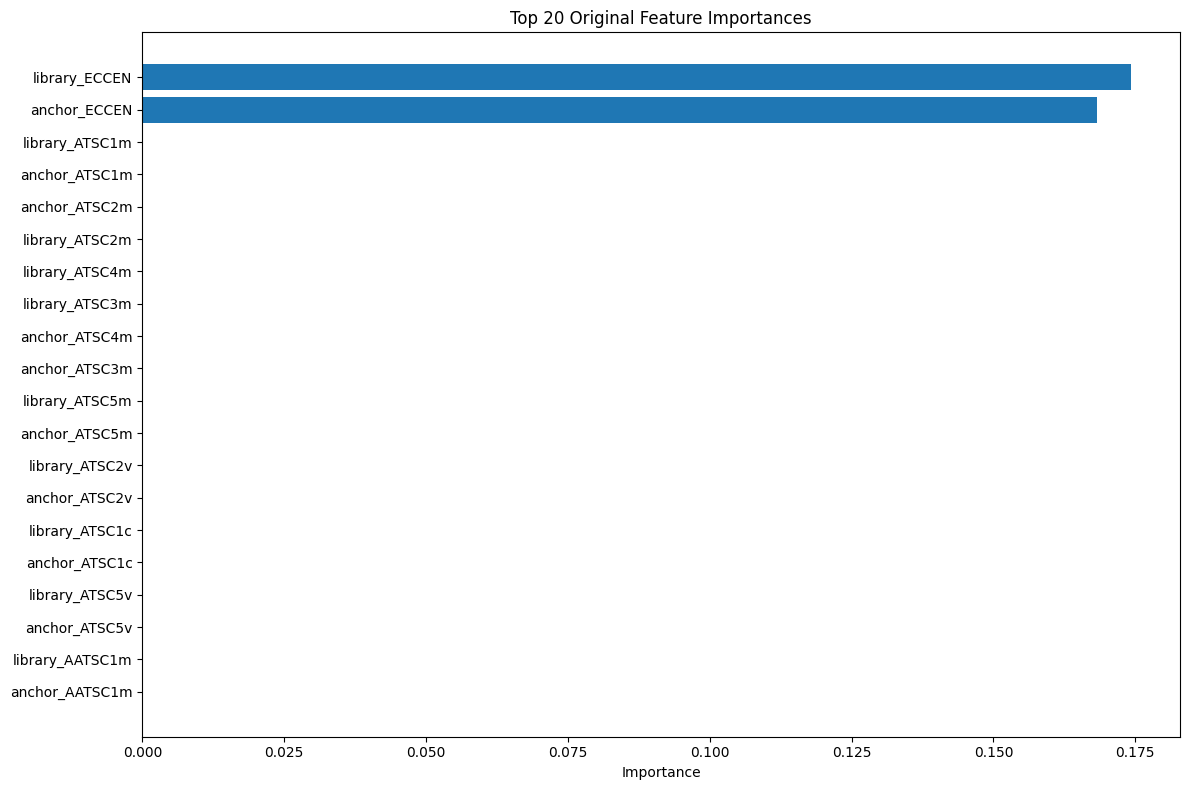

Top 10 most important original features:
                  Importance
library_ECCEN   1.741620e-01
anchor_ECCEN    1.681820e-01
library_ATSC1m  1.668686e-06
anchor_ATSC1m   1.649068e-06
anchor_ATSC2m   1.131742e-06
library_ATSC2m  1.130814e-06
library_ATSC4m  1.101675e-06
library_ATSC3m  1.055366e-06
anchor_ATSC4m   1.026202e-06
anchor_ATSC3m   9.789588e-07


In [118]:
##### SENSITIVITY ANALYSIS FOR FINDING OUT THE MOST IMPORTANT FEATURES [PCA UNDERLYING FEATURES]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

def sensitivity_analysis(model, X, feature_indices, n_samples=1000):
    sensitivities = []
    
    if X.shape[0] > n_samples:
        indices = np.random.choice(X.shape[0], n_samples, replace=False)
        X_sample = X[indices]
    else:
        X_sample = X
    
    base_prediction = model.predict(X_sample)
    
    for i in tqdm(feature_indices):
        X_modified = X_sample.copy()
        X_modified[:, i] = np.mean(X_sample[:, i])
        new_prediction = model.predict(X_modified)
        sensitivity = np.mean(np.abs(new_prediction - base_prediction))
        sensitivities.append(sensitivity)
    
    return np.array(sensitivities)

# Assuming 'Wide-NN' is your best model and it's already trained
best_model = models['Wide-NN']

# Get feature names from the last fold's training data
feature_names = data_train_final.columns[:-1].tolist()  # Exclude the target variable

# Filter out only PCA components and get their indices
pca_columns = [col for col in feature_names if col.startswith('PC')]
pca_indices = [feature_names.index(col) for col in pca_columns]

# Ensure X_test is a numpy array (using data_test_final from your pre-processing)
X_test_np = data_test_final.iloc[:, :-1].values  # Exclude the target variable

# Perform sensitivity analysis on PCA components
sensitivities = sensitivity_analysis(best_model, X_test_np, pca_indices)

# Get the original feature names (before PCA)
original_feature_names = [col for col in X.columns if col not in pca_columns]

# Create a dictionary to store the importance of each original feature
original_importance = {feature: 0 for feature in original_feature_names}

# Use the PCA object from the last fold
for i, pc_importance in enumerate(sensitivities):
    if i < pca.n_components_:  # Only use available components
        for j, feature_name in enumerate(original_feature_names):
            original_importance[feature_name] += abs(pca.components_[i, j]) * pc_importance

# Convert to DataFrame for easier handling
original_importance_df = pd.DataFrame.from_dict(original_importance, orient='index', columns=['Importance'])
original_importance_df = original_importance_df.sort_values('Importance', ascending=False)

# Plot the importances of original features
plt.figure(figsize=(12, 8))
plt.barh(original_importance_df.index[:20], original_importance_df['Importance'][:20])
plt.xlabel('Importance')
plt.title('Top 20 Original Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print top 10 most important original features
print("Top 10 most important original features:")
print(original_importance_df.head(10))